In [472]:
### Packages
import json

import pandas as pd

import datetime

import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

In [724]:

with open('game_time_by_turn.jsonl', 'r') as json_file:
    json_list = list(json_file)

for json_str in json_list:
    result = json.loads(json_str)
    print(f"result: {result}")
    print(isinstance(result, dict))

result: {'game_id': 266, 'action_order': [45, 46], 'winner': 46, 'participant_maliciosu': [False, False], 'total_time_cost': '307.8', 'forfeited': True, 'origin': 'EASY-0.json', 'low-effort': True, 'turn_data_list': [], 'reply_dict': {}}
True
result: {'game_id': 267, 'action_order': [45, 46], 'winner': 45, 'participant_maliciosu': [False, False], 'total_time_cost': '211.2', 'forfeited': False, 'origin': 'EASY-2.json', 'low-effort': False, 'turn_data_list': [{'relation': 'HasProperty', 'target': 'red', 'reply': 'NO', 'turn_time_cost': '55.1', 'error_reported': False}, {'relation': 'HasA', 'target': 'yellow color', 'reply': 'NO', 'turn_time_cost': '61.9', 'error_reported': False}, {'relation': 'HasProperty', 'target': 'yellow', 'reply': 'YES', 'turn_time_cost': '49.9', 'error_reported': False}], 'reply_dict': {'NO': 2, 'YES': 1}}
True
result: {'game_id': 268, 'action_order': [47, 28], 'winner': 47, 'participant_maliciosu': [False, False], 'total_time_cost': '952.8', 'forfeited': False, '

In [725]:
df = pd.read_json('participant_game_order.jsonl', lines=True)


In [726]:
df

,player_id,game_order
0,45,"[{'game_id': 266, 'timestampStr': '26-Aug-2021..."
1,46,"[{'game_id': 266, 'timestampStr': '26-Aug-2021..."
2,47,"[{'game_id': 268, 'timestampStr': '26-Aug-2021..."
3,28,"[{'game_id': 268, 'timestampStr': '26-Aug-2021..."
4,48,"[{'game_id': 273, 'timestampStr': '26-Aug-2021..."
...,...,...
97,171,"[{'game_id': 626, 'timestampStr': '25-Sep-2021..."
98,172,"[{'game_id': 632, 'timestampStr': '25-Sep-2021..."
99,173,"[{'game_id': 636, 'timestampStr': '25-Sep-2021..."
100,174,"[{'game_id': 642, 'timestampStr': '25-Sep-2021..."


In [727]:
def order_games(x):
    list_dates = []
    list_game_id = []
    for elem in x:
        list_dates.append(elem["timestampStr"])
        list_game_id.append(elem["game_id"])
    list_data_initial = list_dates.copy()
    list_dates.sort()
    
    ordered_list_game_id = []
    for elem in list_dates:
        ordered_list_game_id.append(list_game_id[list_data_initial.index(elem)])
    return ordered_list_game_id

print(df["game_order"][0])
print(df["game_order"].apply(lambda x: order_games(x))[0])
df["game_orderered"] = df["game_order"].apply(lambda x: order_games(x))
print(df["game_orderered"][0])

df.to_csv("player_game_order.csv")

[{'game_id': 266, 'timestampStr': '26-Aug-2021 (14:06:36.667227)'}, {'game_id': 267, 'timestampStr': '26-Aug-2021 (14:11:44.588861)'}, {'game_id': 269, 'timestampStr': '26-Aug-2021 (14:15:16.421013)'}, {'game_id': 270, 'timestampStr': '26-Aug-2021 (14:26:04.808572)'}, {'game_id': 272, 'timestampStr': '26-Aug-2021 (14:33:47.610905)'}, {'game_id': 274, 'timestampStr': '26-Aug-2021 (14:42:44.633805)'}]
[266, 267, 269, 270, 272, 274]
[266, 267, 269, 270, 272, 274]


In [728]:
df

,player_id,game_order,game_orderered
0,45,"[{'game_id': 266, 'timestampStr': '26-Aug-2021...","[266, 267, 269, 270, 272, 274]"
1,46,"[{'game_id': 266, 'timestampStr': '26-Aug-2021...","[404, 406, 266, 267, 269, 270, 275, 278]"
2,47,"[{'game_id': 268, 'timestampStr': '26-Aug-2021...","[268, 271, 273, 275, 278, 363, 364]"
3,28,"[{'game_id': 268, 'timestampStr': '26-Aug-2021...","[268, 271, 272, 274]"
4,48,"[{'game_id': 273, 'timestampStr': '26-Aug-2021...","[273, 282]"
...,...,...,...
97,171,"[{'game_id': 626, 'timestampStr': '25-Sep-2021...","[626, 628, 631, 633, 634]"
98,172,"[{'game_id': 632, 'timestampStr': '25-Sep-2021...","[632, 635, 639, 644, 648]"
99,173,"[{'game_id': 636, 'timestampStr': '25-Sep-2021...","[636, 637, 641, 643, 648, 651]"
100,174,"[{'game_id': 642, 'timestampStr': '25-Sep-2021...","[642, 643, 646, 647, 650, 652]"


In [729]:
df[df['player_id'] == 175]["game_orderered"].values[0].index(647)

1

In [730]:
pd.read_csv('player_game_order.csv')

,Unnamed: 0,player_id,game_order,game_orderered
0,0,45,"[{'game_id': 266, 'timestampStr': '26-Aug-2021...","[266, 267, 269, 270, 272, 274]"
1,1,46,"[{'game_id': 266, 'timestampStr': '26-Aug-2021...","[404, 406, 266, 267, 269, 270, 275, 278]"
2,2,47,"[{'game_id': 268, 'timestampStr': '26-Aug-2021...","[268, 271, 273, 275, 278, 363, 364]"
3,3,28,"[{'game_id': 268, 'timestampStr': '26-Aug-2021...","[268, 271, 272, 274]"
4,4,48,"[{'game_id': 273, 'timestampStr': '26-Aug-2021...","[273, 282]"
...,...,...,...,...
97,97,171,"[{'game_id': 626, 'timestampStr': '25-Sep-2021...","[626, 628, 631, 633, 634]"
98,98,172,"[{'game_id': 632, 'timestampStr': '25-Sep-2021...","[632, 635, 639, 644, 648]"
99,99,173,"[{'game_id': 636, 'timestampStr': '25-Sep-2021...","[636, 637, 641, 643, 648, 651]"
100,100,174,"[{'game_id': 642, 'timestampStr': '25-Sep-2021...","[642, 643, 646, 647, 650, 652]"


In [731]:
df = pd.read_csv("total_extracted_knowledge.csv")

In [732]:
df.nb_game_session_asker.value_counts().sort_index()

0      5370
1      6780
2      5663
3     12036
4     16661
5     10387
6      4417
7      2433
8       330
9       203
10      682
11      584
12      540
13       63
14      452
15      510
16      322
17      228
18      349
19      720
20       48
21      376
22      937
23      124
24      630
25      147
26      133
27      112
28      113
29      409
30      369
31      431
32       91
33      255
34      131
35      347
36      320
37       89
38      359
39       83
40      376
41       52
42       52
43       48
44       80
45      100
46      200
47      139
48       52
49       57
50       52
51       49
Name: nb_game_session_asker, dtype: int64

In [733]:
df.head()

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time
0,"+ ( plum, HasProperty, red )",generative,positive,plum,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1
1,"+ ( grapefruit, HasProperty, red )",generative,positive,grapefruit,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1
2,"+ ( cherry, HasProperty, red )",generative,positive,cherry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1
3,"+ ( raspberry, HasProperty, red )",generative,positive,raspberry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1
4,"+ ( pear, HasProperty, yellow )",generative,positive,pear,NaN,HasProperty,yellow,267,EASY,2,45,46,1,3,49.9


In [734]:
df["knowledge_sign"].replace({"positive":"+", "negative":"-"}, inplace=True)
df["knowledge_type"].replace({"discriminative":"discr.", "generative":"gen."}, inplace=True)

In [735]:
df["knowledge category"] = df.apply(lambda x: x["knowledge_type"] + " " + x["knowledge_sign"], axis=1)

In [736]:
df[df["knowledge_type"] == "generative"]["relation"].value_counts()

Series([], Name: relation, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

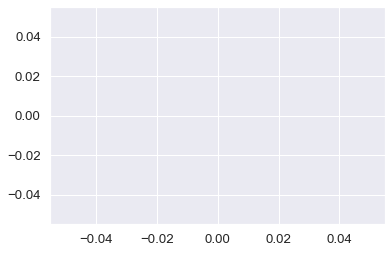

In [737]:
df[df["knowledge_type"] == "generative"].groupby(["relation", "game_level"]).size().plot(kind='barh')

<AxesSubplot:xlabel='relation', ylabel='count'>

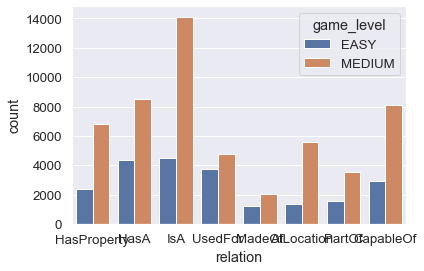

In [738]:
sns.countplot(data=df,x='relation',hue='game_level')

In [739]:
x,y = 'relation', 'game_level'

(df[df["knowledge_type"] == "generative"]
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)


ValueError: min() arg is an empty sequence

In [740]:
x,y = 'relation', 'game_level'

(df[df["knowledge_type"] == "discriminative"]
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)

ValueError: min() arg is an empty sequence

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'IsA'),
  Text(1, 0, 'HasA'),
  Text(2, 0, 'CapableOf'),
  Text(3, 0, 'HasProperty'),
  Text(4, 0, 'AtLocation'),
  Text(5, 0, 'UsedFor'),
  Text(6, 0, 'PartOf'),
  Text(7, 0, 'MadeOf')])

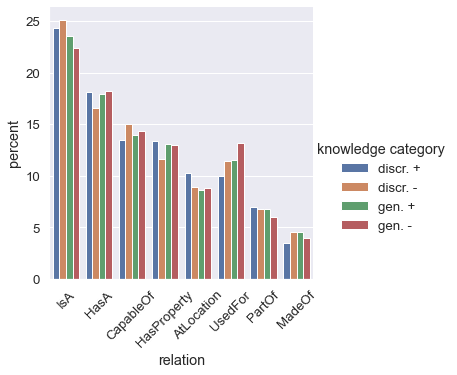

In [741]:
x,y = 'relation', "knowledge category"

(df
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)

In [742]:
x,y = 'round_id', 'relation'

(df[df["knowledge_type"] == "generative"]
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)

ValueError: min() arg is an empty sequence

In [743]:
x,y = 'round_id', 'relation'

(df[df["knowledge_type"] == "discriminative"]
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)

ValueError: min() arg is an empty sequence

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

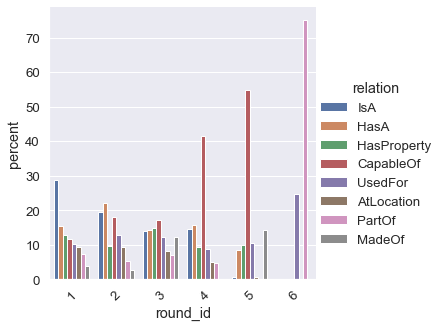

In [744]:
x,y = 'round_id', 'relation'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)

In [494]:
sample_df = df.groupby("asker_id").sample(n=10, random_state=1)


In [495]:
plt.figure(figsize=(10,1))

x,y = 'asker_id', 'relation'

(sample_df[sample_df["knowledge_type"] == "generative"]
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation=45)
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 720x72 with 0 Axes>

In [496]:
df[df["knowledge_type"] == "generative"].groupby(["round_id", "relation"]).size()

Series([], dtype: int64)

In [497]:
# Throughput plots



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

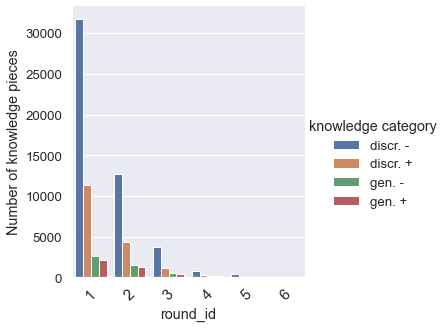

In [498]:
x,y = 'round_id', 'knowledge category'

(df
.groupby(x)[y]
.value_counts(normalize=False)
#.mul(100)
.rename('Number of knowledge pieces')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Number of knowledge pieces',hue=y,kind='bar'))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

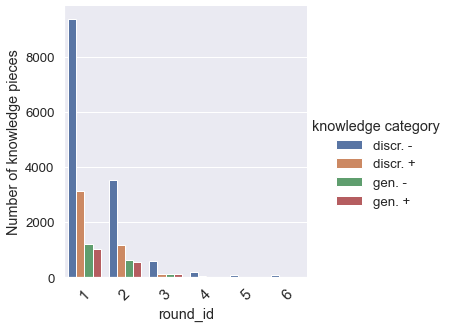

In [499]:
x,y = 'round_id', 'knowledge category'

(df[df["game_level"] == "EASY"]
.groupby(x)[y]
.value_counts(normalize=False)
#.mul(100)
.rename('Number of knowledge pieces')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Number of knowledge pieces',hue=y,kind='bar'))
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

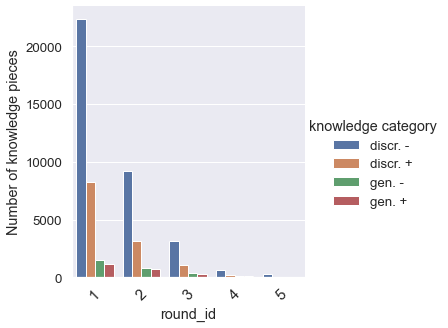

In [500]:
x,y = 'round_id', 'knowledge category'

(df[df["game_level"] == "MEDIUM"]
.groupby(x)[y]
.value_counts(normalize=False)
#.mul(100)
.rename('Number of knowledge pieces')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Number of knowledge pieces',hue=y,kind='bar'))
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'EASY'), Text(1, 0, 'MEDIUM')])

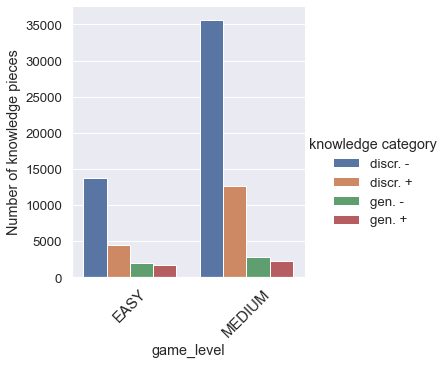

In [501]:
x,y = 'game_level', 'knowledge category'

(df
.groupby(x)[y]
.value_counts(normalize=False)
#.mul(100)
.rename('Number of knowledge pieces')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Number of knowledge pieces',hue=y,kind='bar'))
plt.xticks(rotation=45)

(array([0, 1]), [Text(0, 0, 'EASY'), Text(1, 0, 'MEDIUM')])

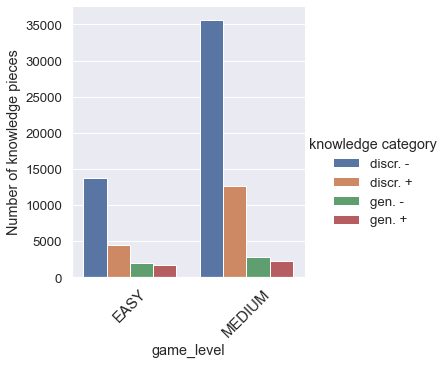

In [502]:
x,y = 'game_level', 'knowledge category'

(df
.groupby(x)[y]
.value_counts(normalize=False)
#.mul(100)
.rename('Number of knowledge pieces')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='Number of knowledge pieces',hue=y,kind='bar'))
plt.xticks(rotation=45)

In [503]:
df

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category
0,"+ ( plum, HasProperty, red )",gen.,+,plum,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
1,"+ ( grapefruit, HasProperty, red )",gen.,+,grapefruit,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
2,"+ ( cherry, HasProperty, red )",gen.,+,cherry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
3,"+ ( raspberry, HasProperty, red )",gen.,+,raspberry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
4,"+ ( pear, HasProperty, yellow )",gen.,+,pear,NaN,HasProperty,yellow,267,EASY,2,45,46,1,3,49.9,gen. +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75486,"- ( cherry, strawberry, HasA, edible skin )",discr.,-,cherry,strawberry,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75487,"- ( cherry, grapefruit, HasA, edible skin )",discr.,-,cherry,grapefruit,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75488,"- ( cherry, peach, HasA, edible skin )",discr.,-,cherry,peach,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75489,"- ( cherry, orange, HasA, edible skin )",discr.,-,cherry,orange,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -


In [504]:
print("TODO: plot simple distribution and based on the number of turn ID")

x,y = 'game_ID', 'knowledge category'


(df
.groupby(x)[y]
.value_counts(normalize=False, sort=True).reset_index())
#.plot(kind='hist'))

TODO: plot simple distribution and based on the number of turn ID


ValueError: cannot insert knowledge category, already exists

<AxesSubplot:ylabel='Frequency'>

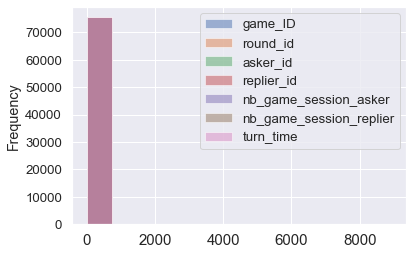

In [505]:
df.plot.hist(bins=12, alpha=0.5)

In [506]:
ax = df.hist(column='session_duration_seconds', by='user_type', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)


KeyError: 'user_type'

In [507]:
df.groupby(["game_ID", "knowledge category"]).size().reset_index(name = "Group_Count")

,game_ID,knowledge category,Group_Count
0,267,discr. +,36
1,267,discr. -,52
2,267,gen. +,10
3,267,gen. -,10
4,268,discr. +,20
...,...,...,...
1000,656,gen. -,14
1001,657,discr. +,175
1002,657,discr. -,542
1003,657,gen. +,32


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

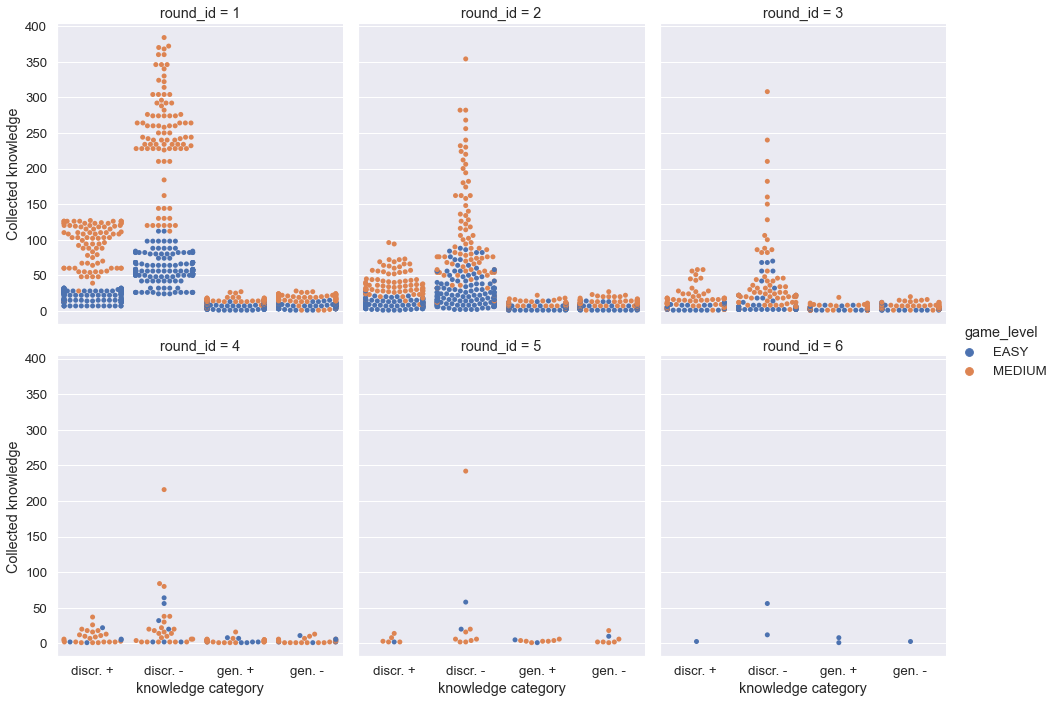

In [508]:
sns.set(font_scale=1.2)


sns.catplot(x="knowledge category", y="Collected knowledge",  hue="game_level", aspect=.9,  kind="swarm", col="round_id", col_wrap=3, data=df.groupby(["game_ID", "knowledge category", "game_level", "round_id"]).size().reset_index(name = "Collected knowledge"))
#plt.xticks(rotation=45)

In [520]:
df.groupby(["game_ID", "knowledge category", "game_level", "round_id"]).size().reset_index(name = "Collected knowledge")

,game_ID,knowledge category,game_level,round_id,Collected knowledge
0,267,discr. +,EASY,1,32
1,267,discr. +,EASY,2,4
2,267,discr. -,EASY,1,48
3,267,discr. -,EASY,2,4
4,267,gen. +,EASY,1,8
...,...,...,...,...,...
2375,657,gen. +,MEDIUM,4,2
2376,657,gen. -,MEDIUM,1,24
2377,657,gen. -,MEDIUM,2,7
2378,657,gen. -,MEDIUM,3,12


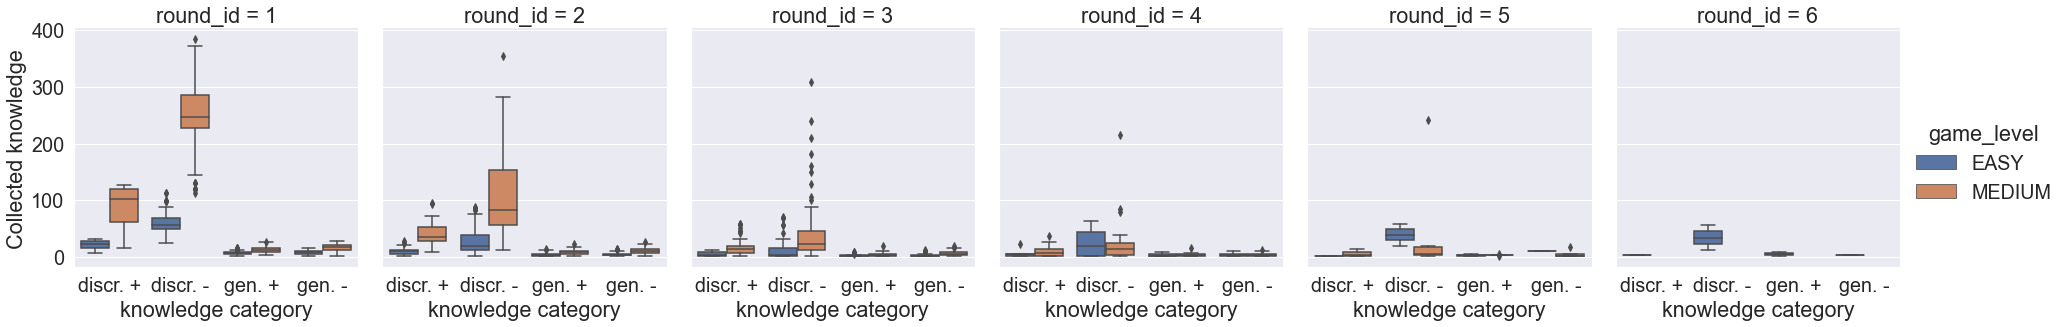

In [530]:
sns.set(font_scale=1.8)


g = sns.catplot(x="knowledge category", y="Collected knowledge",  hue="game_level", aspect=.9,  kind="box", col="round_id", col_wrap=6, data=df.groupby(["game_ID", "knowledge category", "game_level", "round_id"]).size().reset_index(name = "Collected knowledge"))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [559]:
df_throughput = df.groupby(["game_ID", "knowledge category", "game_level", "round_id"]).size().reset_index(name = "Collected knowledge")
print(len(df_throughput))
df_temp = df[["turn_time", "game_ID","knowledge category", "game_level", "round_id"]].drop_duplicates(subset=["game_ID","knowledge category", "game_level", "round_id"])
print(df_temp)
df_throughput = df_throughput.merge(df_temp, on=["game_ID","knowledge category", "game_level", "round_id"], how='left')
print(len(df_throughput))

df_throughput["turn_throughput"] = df_throughput.apply(lambda x: x["Collected knowledge"] / x["turn_time"], axis=1)

2380
       turn_time  game_ID knowledge category game_level  round_id
0           55.1      267             gen. +       EASY         1
4           49.9      267             gen. +       EASY         2
10          55.1      267             gen. -       EASY         1
14          49.9      267             gen. -       EASY         2
20          55.1      267           discr. +       EASY         1
...          ...      ...                ...        ...       ...
74868       44.1      657           discr. +     MEDIUM         4
74949       60.0      657           discr. -     MEDIUM         1
75079       70.6      657           discr. -     MEDIUM         2
75129       31.1      657           discr. -     MEDIUM         3
75141       44.1      657           discr. -     MEDIUM         4

[2380 rows x 5 columns]
2380


In [560]:
df_throughput

,game_ID,knowledge category,game_level,round_id,Collected knowledge,turn_time,turn_throughput
0,267,discr. +,EASY,1,32,55.1,0.580762
1,267,discr. +,EASY,2,4,49.9,0.080160
2,267,discr. -,EASY,1,48,55.1,0.871143
3,267,discr. -,EASY,2,4,49.9,0.080160
4,267,gen. +,EASY,1,8,55.1,0.145191
...,...,...,...,...,...,...,...
2375,657,gen. +,MEDIUM,4,2,44.1,0.045351
2376,657,gen. -,MEDIUM,1,24,60.0,0.400000
2377,657,gen. -,MEDIUM,2,7,70.6,0.099150
2378,657,gen. -,MEDIUM,3,12,31.1,0.385852


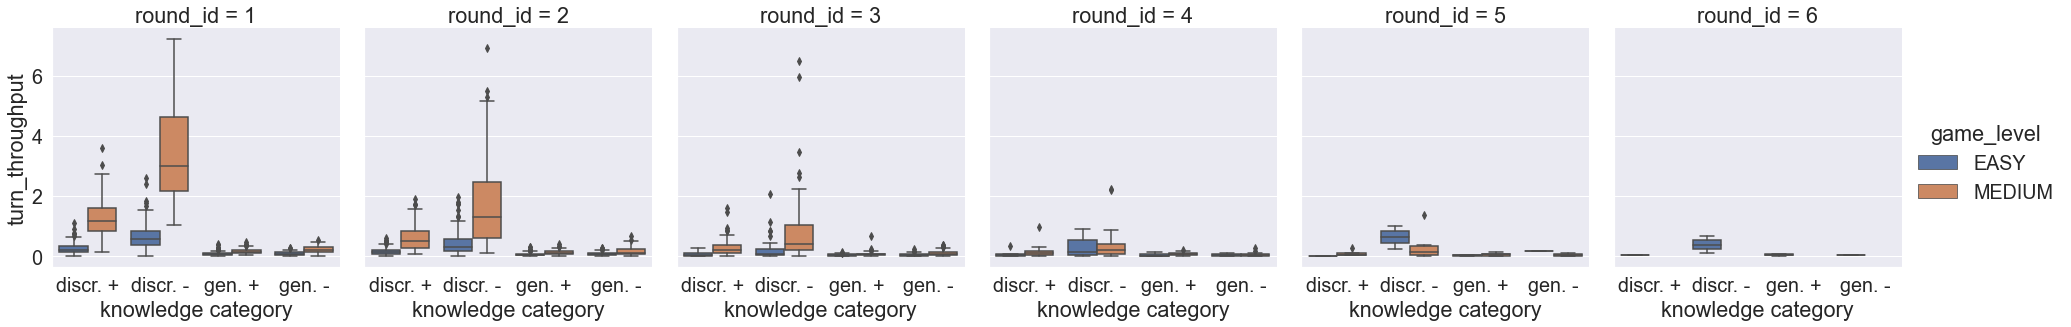

In [561]:
sns.set(font_scale=1.8)


g = sns.catplot(x="knowledge category", y="turn_throughput",  hue="game_level", aspect=.9,  kind="box", col="round_id", col_wrap=6, data=df_throughput)



/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 72.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 91.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 89.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

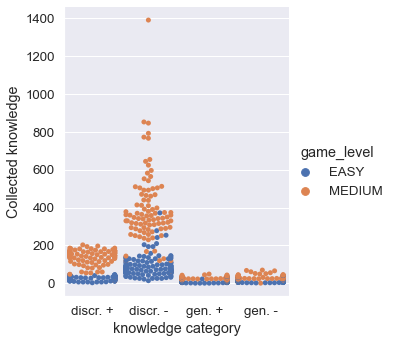

In [509]:
sns.set(font_scale=1.2)


sns.catplot(x="knowledge category", y="Collected knowledge",  hue="game_level", aspect=.9,  kind="swarm",  data=df.groupby(["game_ID", "knowledge category", "game_level"]).size().reset_index(name = "Collected knowledge"))
#plt.xticks(rotation=45)

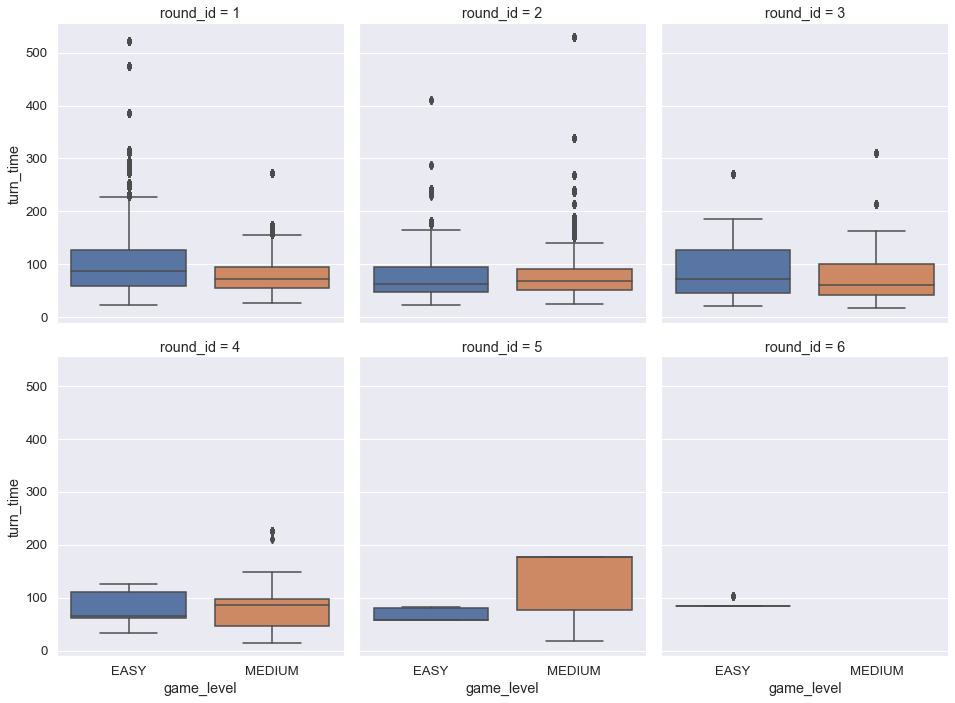

In [510]:
# time per round

sns.catplot(x="game_level", y="turn_time",  col="round_id", aspect=.9, col_wrap=3, kind="box",  data=df[df["turn_time"] < 8000])



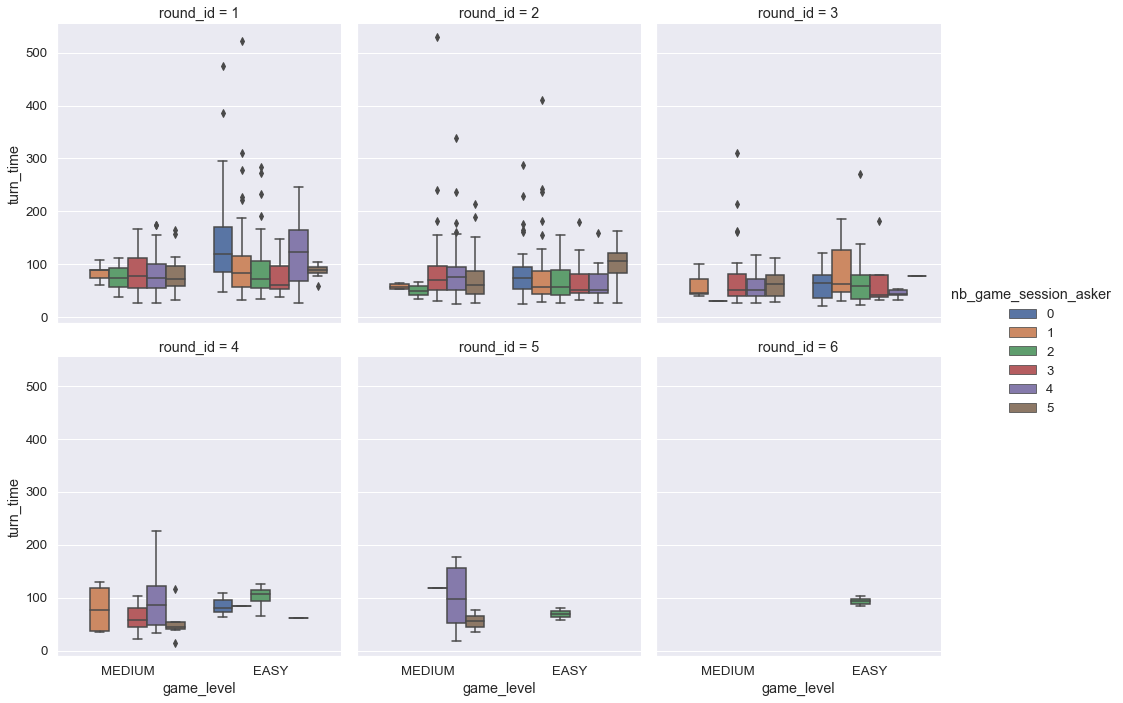

In [511]:
# Number of rounds
#df.groupby(['game_level','game_ID'])['round_id'].max().reset_index()
#['round_id'].value_counts().sort_index(ascending=False).plot(kind = 'box')
sns.catplot(x="game_level", y="turn_time", hue="nb_game_session_asker", col="round_id", col_wrap=3, aspect=.9,  kind="box",  data=df[(df["nb_game_session_asker"] < 6) & (df["turn_time"] < 8000)].groupby(['turn_time','nb_game_session_asker', 'game_level','game_ID'])['round_id'].max().reset_index())



discr. -


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

gen. +


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

discr. +


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

gen. -


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

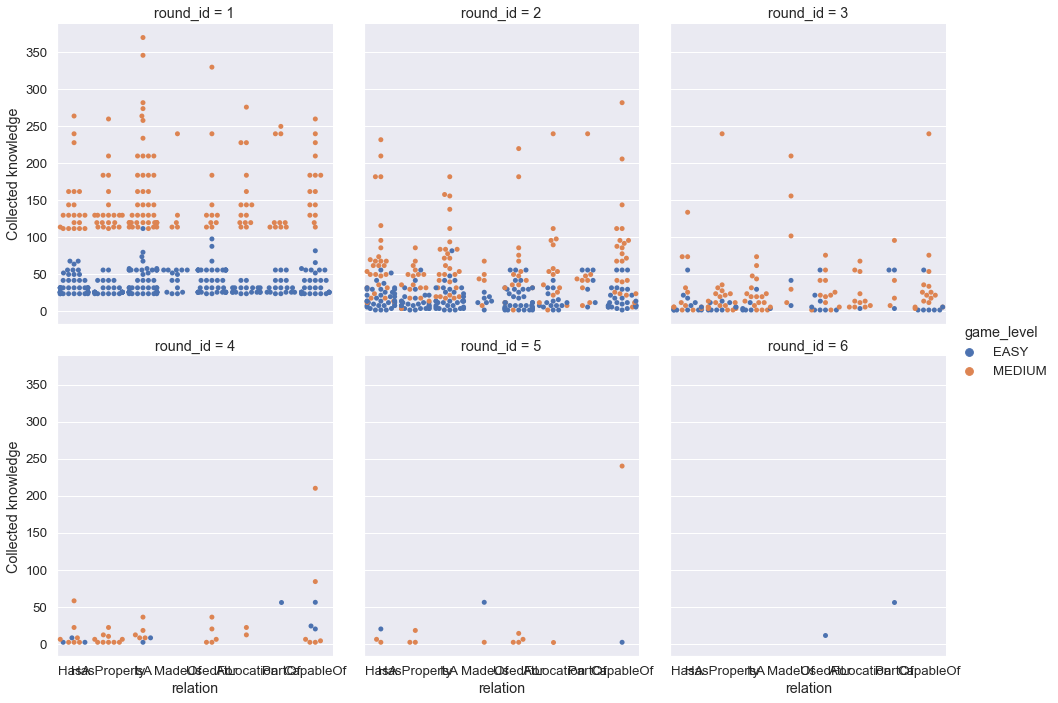

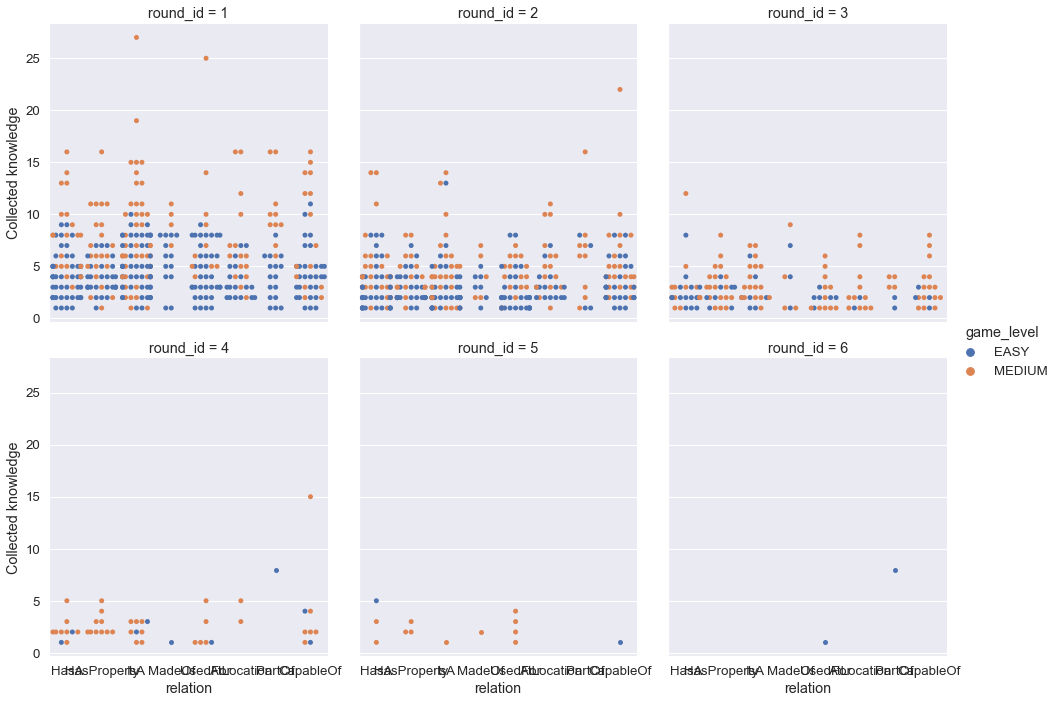

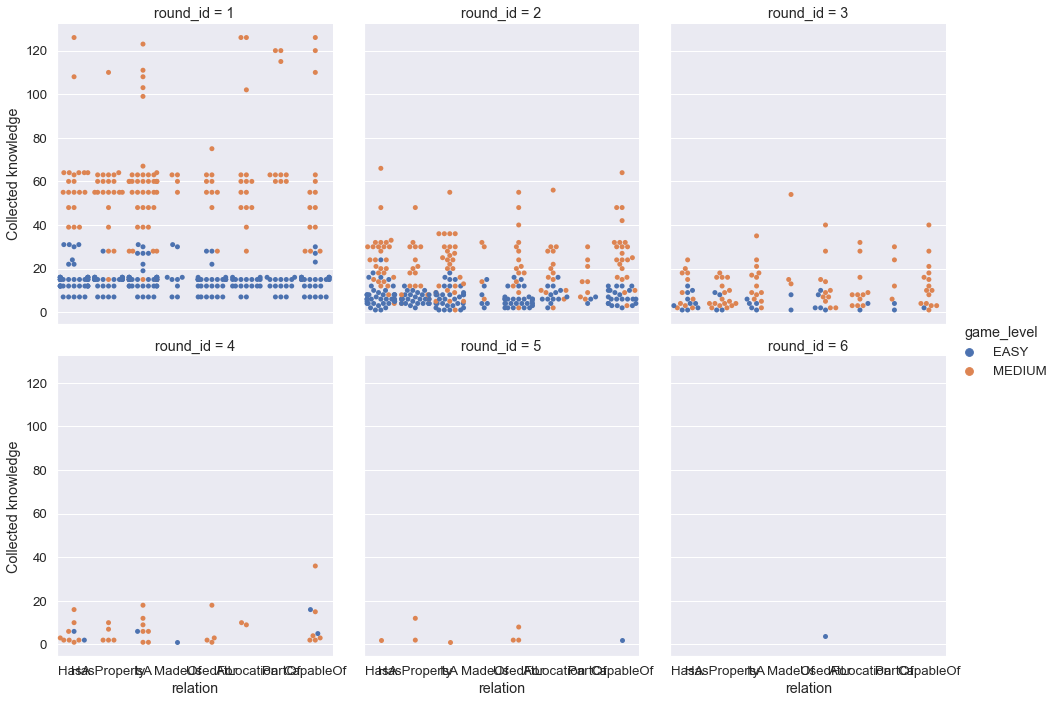

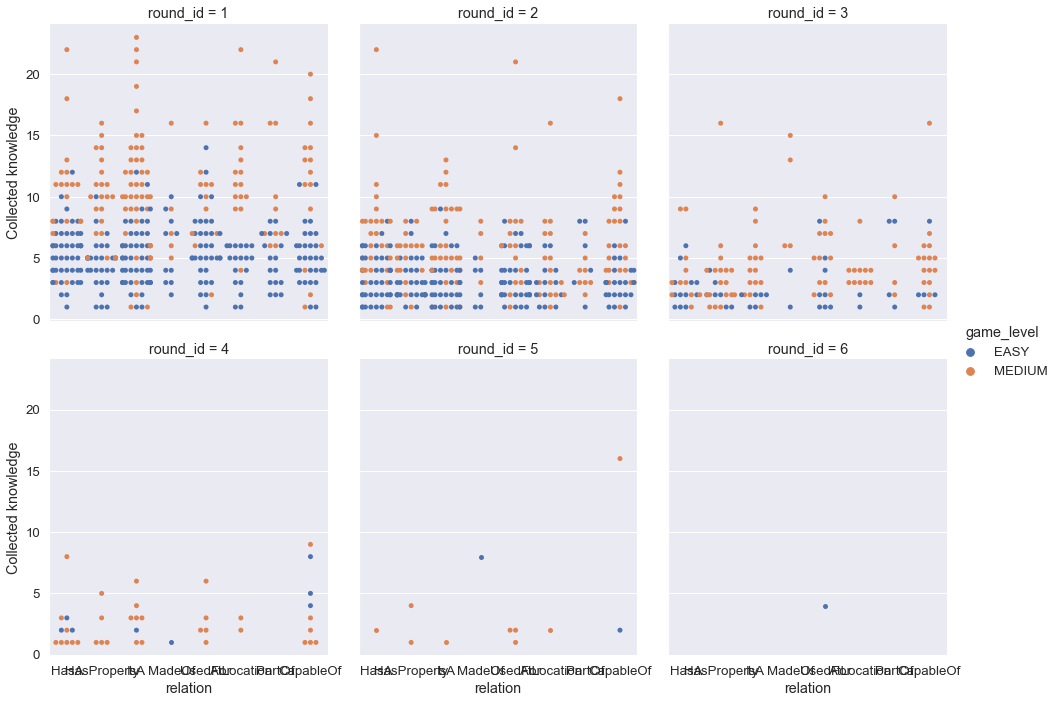

In [512]:
sns.set(font_scale=1.2)

for knowledge_characteristics in list(set(list(df["knowledge category"]))):
    print(knowledge_characteristics)
    sns.catplot(x="relation", y="Collected knowledge",  hue="game_level", aspect=.9,  kind="swarm", col="round_id", col_wrap=3, data=df[df["knowledge category"] == knowledge_characteristics].groupby(["game_ID", "knowledge category", "game_level", "relation", "round_id"]).size().reset_index(name = "Collected knowledge"))
#plt.xticks(rotation=45)

/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

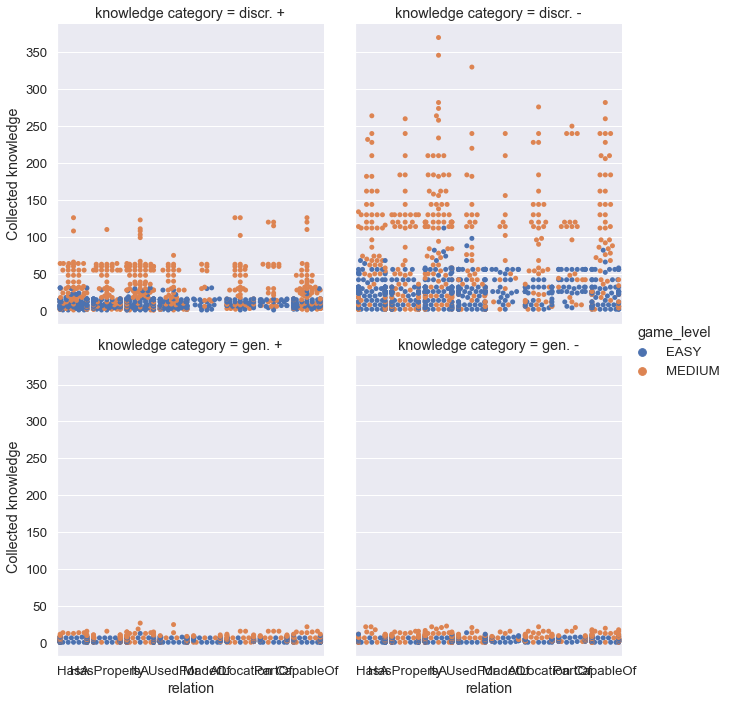

In [513]:
a1 = df.groupby(["game_level", "game_ID",   "round_id", "relation", "knowledge category"]).size().reset_index(name = "Collected knowledge")

sns.catplot(x="relation", y="Collected knowledge",  hue="game_level", aspect=.9,  kind="swarm", col="knowledge category", col_wrap=2, data=a1)



discr. -


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 55.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

gen. +


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

discr. +


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

gen. -


/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 69.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/abalayn/Documents/PhD/GWAP/GWAP_env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

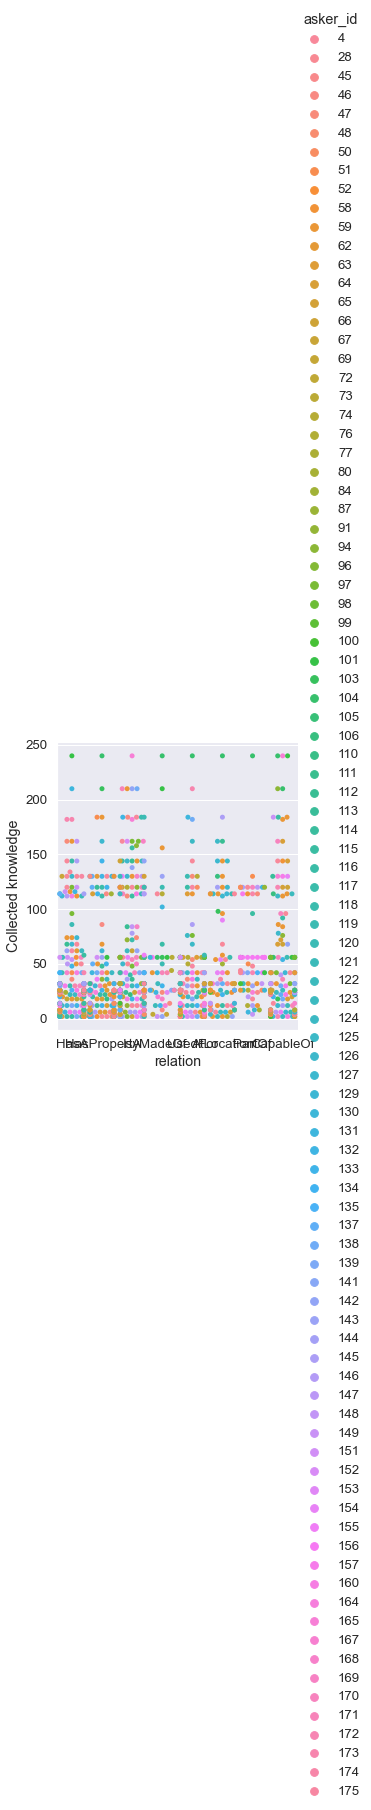

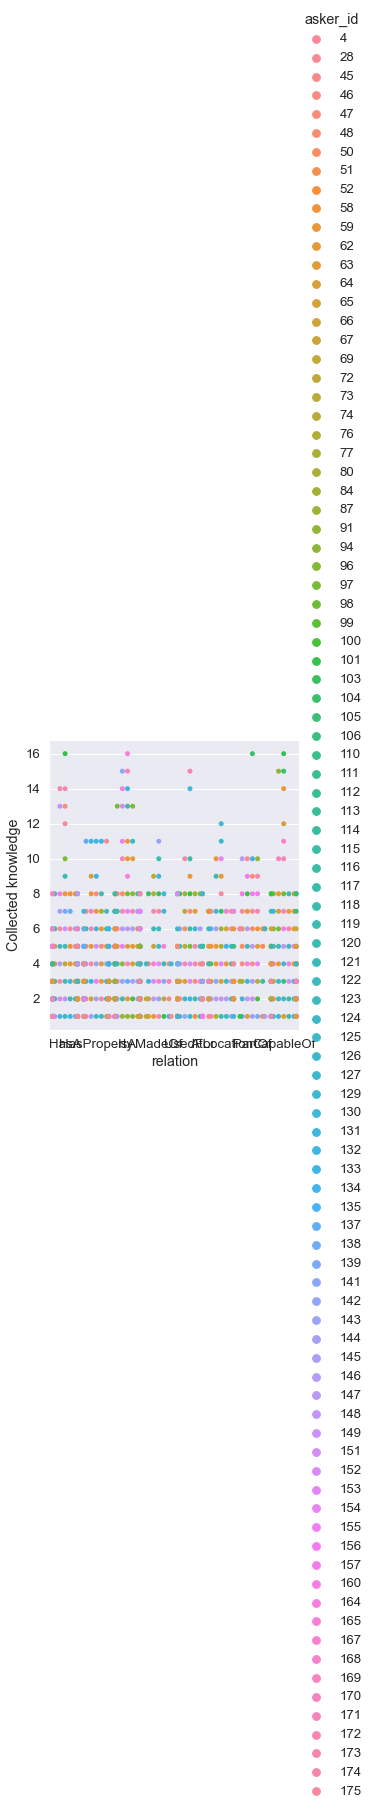

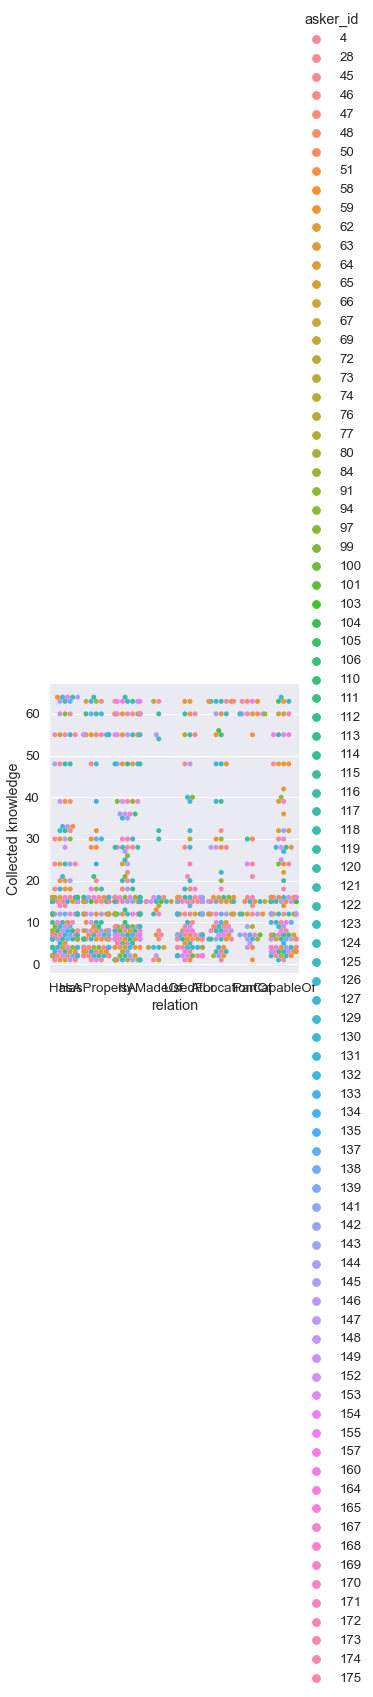

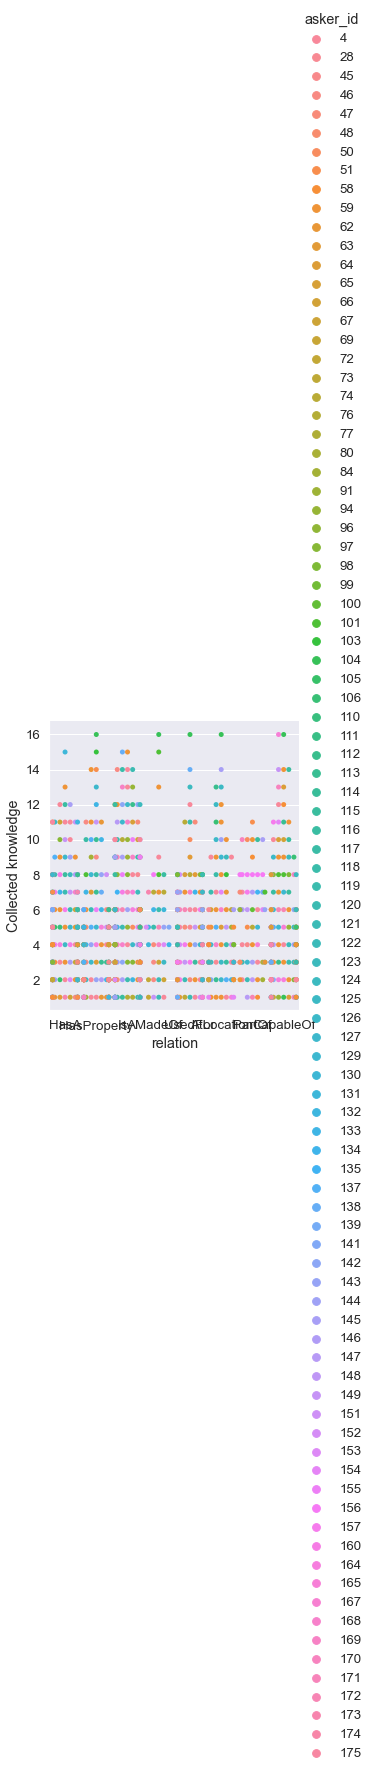

In [514]:
sns.set(font_scale=1.2)

for knowledge_characteristics in list(set(list(df["knowledge category"]))):
    print(knowledge_characteristics)
    sns.catplot(x="relation", y="Collected knowledge",  hue="asker_id", aspect=.9,  kind="swarm",  data=df[df["knowledge category"] == knowledge_characteristics].groupby(["game_ID", "knowledge category", "game_level", "relation", "round_id", "asker_id"]).size().reset_index(name = "Collected knowledge"))
#plt.xticks(rotation=45)

In [515]:
dups_color_and_shape = df.pivot_table(columns=['knowledge_piece'], aggfunc='size').reset_index(name = "count_knowledge")
print (dups_color_and_shape)
print(dups_color_and_shape["count_knowledge"].value_counts)


df3 = (df[['game_ID', 'knowledge_piece']].value_counts().reset_index(name = "count_knowledge"))
print("overlap within a game: ", df3["count_knowledge"].value_counts())


df4 = (df[['knowledge_piece']].value_counts().reset_index(name = "count_knowledge"))
print("overlap across game: ", df4["count_knowledge"].value_counts())



                                       knowledge_piece  count_knowledge
0                  + ( accordion, CapableOf, be held )                1
1          + ( accordion, CapableOf, be held in hand )                1
2                     + ( accordion, MadeOf, strings )                1
3                      + ( accordion, UsedFor, sound )                1
4              + ( accordion, flute, MadeOf, strings )                1
...                                                ...              ...
68757              - ( zebra, tiger, UsedFor, eating )                1
68758  - ( zebra, trout, HasA, red shell when cooked )                1
68759                 - ( zebra, trout, IsA, mollusk )                1
68760   - ( zebra, tuna, HasA, red shell when cooked )                1
68761                  - ( zebra, tuna, IsA, mollusk )                1

[68762 rows x 2 columns]
<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        1
3        1
4        1
        ..


In [516]:
print(len(list(set(list(df["game_ID"])))))
print(len(df))


255
75491


In [517]:
print(len(list(set(list(df["knowledge_piece"])))))

68762


# Selection for qualitative analysis

In [518]:
# Get knowledge from medium games.

df_subset = df[(df["knowledge_type"] == "generative") & (df["game_level"] == "MEDIUM")]

import random
sample_games  = random.sample((list(set(list(df_subset["game_ID"])))), 30)
print(len(df_subset[df_subset["game_ID"].isin(sample_games)]))


medium_knowledge = df_subset[df_subset["game_ID"].isin(sample_games)]

ValueError: Sample larger than population or is negative

In [211]:
df_subset

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category
869,"+ ( fingers, PartOf, the upper body )",generative,positive,fingers,NaN,PartOf,the upper body,275,MEDIUM,1,47,46,3,6,115.9,generative positive
870,"+ ( finger, PartOf, the upper body )",generative,positive,finger,NaN,PartOf,the upper body,275,MEDIUM,1,47,46,3,6,115.9,generative positive
871,"+ ( shoulder, PartOf, the upper body )",generative,positive,shoulder,NaN,PartOf,the upper body,275,MEDIUM,1,47,46,3,6,115.9,generative positive
872,"+ ( neck, PartOf, the upper body )",generative,positive,neck,NaN,PartOf,the upper body,275,MEDIUM,1,47,46,3,6,115.9,generative positive
873,"+ ( elbow, PartOf, the upper body )",generative,positive,elbow,NaN,PartOf,the upper body,275,MEDIUM,1,47,46,3,6,115.9,generative positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74769,"- ( grapefruit, HasA, edible skin )",generative,negative,grapefruit,NaN,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,generative negative
74770,"- ( peach, HasA, edible skin )",generative,negative,peach,NaN,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,generative negative
74771,"- ( orange, HasA, edible skin )",generative,negative,orange,NaN,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,generative negative
74772,"- ( raspberry, HasA, edible skin )",generative,negative,raspberry,NaN,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,generative negative


In [212]:
import ast


f = open('V4/Match_4.json')
data = json.load(f)
f.close()

game_df = pd.DataFrame(data)[["id","objects"]]

def make_list_concepts(x):
    x = ast.literal_eval(x)
    concepts = []
    for elem in x:
        concepts.append(elem["id"])
    return concepts
        
game_df["list_concepts"] = game_df["objects"].apply(lambda x: make_list_concepts(x))

In [213]:
game_df

,id,objects,list_concepts
0,266,"[{""id"": ""squirrel"", ""image_url"": ""https://imag...","[squirrel, mink, raccoon, otter, mole, skunk, ..."
1,267,"[{""id"": ""grapefruit"", ""image_url"": ""https://ww...","[grapefruit, prune, avocado, plum, raspberry, ..."
2,268,"[{""id"": ""actress"", ""image_url"": ""https://media...","[actress, wife, cousin, daughter, mother, aunt..."
3,269,"[{""id"": ""spoon"", ""image_url"": ""https://www.arc...","[spoon, sink, ladle, fridge, blender, kettle, ..."
4,270,"[{""id"": ""garlic"", ""image_url"": ""https://antoga...","[garlic, celery, avocado, beans, broccoli, egg..."
...,...,...,...
288,653,"[{""id"": ""tuba"", ""image_url"": ""https://twoba.hu...","[tuba, guitar, clarinet, bagpipe, trumpet, ban..."
289,654,"[{""id"": ""spear"", ""image_url"": ""https://static....","[spear, birch, bed, pine, bayonet, spade, will..."
290,655,"[{""id"": ""meal"", ""image_url"": ""https://res.clou...","[meal, supper, soup, steak, bacon, salad, sand..."
291,656,"[{""id"": ""eel"", ""image_url"": ""https://3.bp.blog...","[eel, shrimp, salmon, crab, lobster, catfish, ..."


In [214]:
game_id

529

In [215]:
set_concepts = []

for game_id in sample_games:
    set_concepts += (game_df[game_df["id"] == game_id]["list_concepts"].values[0])

In [216]:
set_concepts

['gown',
 'jacket',
 'sack',
 'wheelbarrow',
 'blouse',
 'shirt',
 'skirt',
 'trousers',
 'coat',
 'pants',
 'shoes',
 'boots',
 'bag',
 'dress',
 'jeans',
 'socks',
 'bone',
 'toe',
 'arm',
 'blood',
 'eye',
 'body',
 'skin',
 'neck',
 'hair',
 'nail',
 'kidney',
 'liver',
 'muscle',
 'ankle',
 'leg',
 'elbow',
 'microwave',
 'tray',
 'stove',
 'bed',
 'freezer',
 'cupboard',
 'toilet',
 'blender',
 'toaster',
 'kettle',
 'closet',
 'dishwasher',
 'door',
 'fridge',
 'sink',
 'oven',
 'shoulder',
 'arm',
 'toe',
 'fingers',
 'forearm',
 'hand',
 'neck',
 'foot',
 'thigh',
 'knees',
 'knee',
 'wrist',
 'finger',
 'ankle',
 'leg',
 'elbow',
 'walls',
 'ceiling',
 'bar',
 'arm',
 'fingers',
 'roof',
 'room',
 'hand',
 'neck',
 'floor',
 'window',
 'bathroom',
 'deck',
 'finger',
 'tower',
 'leg',
 'shoulder',
 'arm',
 'toe',
 'fingers',
 'forearm',
 'hand',
 'neck',
 'foot',
 'thigh',
 'knees',
 'knee',
 'wrist',
 'finger',
 'ankle',
 'leg',
 'elbow',
 'chicken',
 'perch',
 'octopus',
 '

In [217]:
# Get easy games which have one of these concepts

df_subset_easy = df[(df["knowledge_type"] == "generative") & (df["game_level"] == "EASY")]
print("All easy knowledge", len(df_subset_easy), "original number of games", len(list(set(list(df_subset_easy["game_ID"])))))


df_subset_easy1 = df_subset_easy[df_subset_easy["concept1"].isin(set_concepts)]
print("Filtered easy knowledge", len(df_subset_easy1), "Nb. games", len(list(set(list(df_subset_easy1["game_ID"])))))


# Are we repeating games?
check_concepts = []
check_game_id = []
for index, row in df_subset_easy.iterrows():
    if (row["concept1"] in (set_concepts)) and (row["concept1"] not in (check_concepts)):
        check_concepts.append(row["concept1"])
        check_game_id.append(row["game_ID"])
df_subset_easy2 = df_subset_easy[df_subset_easy["game_ID"].isin(check_game_id)]
print( "knowledge pieces", len(df_subset_easy2), "Filtered games2", len(list(set(list(check_game_id)))))

# Check count games

# Check count knowledge pieces

All easy knowledge 3729 original number of games 164
Filtered easy knowledge 2429 Nb. games 147
knowledge pieces 753 Filtered games2 33


In [218]:
df_subset_easy

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category
0,"+ ( plum, HasProperty, red )",generative,positive,plum,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,generative positive
1,"+ ( grapefruit, HasProperty, red )",generative,positive,grapefruit,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,generative positive
2,"+ ( cherry, HasProperty, red )",generative,positive,cherry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,generative positive
3,"+ ( raspberry, HasProperty, red )",generative,positive,raspberry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,generative positive
4,"+ ( pear, HasProperty, yellow )",generative,positive,pear,NaN,HasProperty,yellow,267,EASY,2,45,46,1,3,49.9,generative positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74589,"- ( mackerel, HasA, snake like body )",generative,negative,mackerel,NaN,HasA,snake like body,656,EASY,3,127,4,6,23,44.8,generative negative
74590,"- ( crab, HasA, fins )",generative,negative,crab,NaN,HasA,fins,656,EASY,1,4,127,23,6,64.7,generative negative
74591,"- ( lobster, HasA, fins )",generative,negative,lobster,NaN,HasA,fins,656,EASY,1,4,127,23,6,64.7,generative negative
74592,"- ( shrimp, HasA, fins )",generative,negative,shrimp,NaN,HasA,fins,656,EASY,1,4,127,23,6,64.7,generative negative


In [219]:
data_to_annotate = pd.concat([df_subset_easy1, medium_knowledge])

In [220]:
print(len(data_to_annotate))
data_to_annotate = data_to_annotate.drop_duplicates(subset=['concept1', 'NL_input'], keep='first')
print(len(data_to_annotate))

4057
3626


In [225]:
data_to_annotate.to_csv("full_data_to_be_analysed_qualitatively.csv", index=False)

In [229]:
data_to_annotate["knowledge_piece"].to_csv("display_data_to_be_analysed_qualitatively.csv", index=False)

In [231]:
data_common = data_to_annotate.sample(n=300, random_state=1)

In [241]:
data_common.to_csv("common_data_to_be_analysed_qualitatively.csv", index=False)
data_common["knowledge_piece"].to_csv("display_common_data_to_be_analysed_qualitatively.csv", index=False)

In [233]:
data_common

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category
760,"+ ( lamp, HasProperty, makes light )",generative,positive,lamp,NaN,HasProperty,makes light,274,EASY,1,45,28,5,3,58.4,generative positive
10039,"- ( squirrel, UsedFor, swimming )",generative,negative,squirrel,NaN,UsedFor,swimming,349,EASY,1,63,84,5,0,104.1,generative negative
30921,"+ ( ceiling, HasProperty, enclosed )",generative,positive,ceiling,NaN,HasProperty,enclosed,503,EASY,1,124,121,0,1,160.9,generative positive
26732,"+ ( tower, CapableOf, be used home )",generative,positive,tower,NaN,CapableOf,be used home,479,EASY,1,98,4,4,11,130.8,generative positive
51228,"- ( mole, HasA, hooves )",generative,negative,mole,NaN,HasA,hooves,578,MEDIUM,2,132,59,4,22,77.0,generative negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,"+ ( neck, PartOf, upper body )",generative,positive,neck,NaN,PartOf,upper body,366,MEDIUM,1,4,84,38,4,46.5,generative positive
37791,"- ( nail, PartOf, the images displayed )",generative,negative,nail,NaN,PartOf,the images displayed,528,EASY,1,135,137,0,0,155.9,generative negative
45076,"+ ( mink, MadeOf, green )",generative,positive,mink,NaN,MadeOf,green,548,EASY,1,131,142,2,2,56.3,generative positive
51255,"- ( fawn, HasProperty, living in water )",generative,negative,fawn,NaN,HasProperty,living in water,578,MEDIUM,1,59,132,22,4,57.4,generative negative


In [236]:
data_to_annotate_left = data_to_annotate.drop(data_common.index)


In [238]:
import numpy as np

shuffled = data_to_annotate_left.sample(frac=1)
result = np.array_split(shuffled, 5)  

In [242]:
for i in range(len(result)):
    result[i].to_csv("data_to_be_analysed_qualitatively_" + str(i) + ".csv", index=False)
    result[i]["knowledge_piece"].to_csv("display_data_to_be_analysed_qualitatively_" + str(i) + ".csv", index=False)
    


# Exploit qualitative analysis data

### Load all data

In [671]:
list_sheets = ['agathe', 'andrea', 'gaole', 'jie', 'ujwal', 'common_data']

list_df = []
for sheet_name in list_sheets:
    pd_df = pd.read_excel('qualitative_analysis (1).xlsx',
    sheet_name=sheet_name,
    header=0,
    index_col=False,
    keep_default_na=True)
    pd_df.rename( columns={'Unnamed: 0':'tuple'}, inplace=True )
    pd_df = pd_df[pd_df["tuple"].notna()]
    list_df.append(pd_df)

In [672]:
list_df[0]

,tuple,Noise,Correctness,Sensible - sign,Sensible - relation,Meanings,Bias,Typicality,Specificity,Tacitness,Remarks
0,"- ( stereo, HasProperty, round shaped )",Useful,Correct,NaN,NaN,multiple interpretations,3.0,5.0,5.0,1.0,NaN
1,"+ ( rattlesnake, HasProperty, dangerous )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,1.0,1.0,NaN
2,"+ ( canoe, HasProperty, a type of watercraft )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,1.0,3.0,NaN
3,"+ ( rabbit, IsA, sad )",Useful,I don't know,NaN,Incorrect,NaN,3.0,1.0,1.0,5.0,not sure what to make of this fact --it could ...
4,"+ ( foot, HasProperty, lower body )",Useful,Incorrect,NaN,Incorrect,NaN,1.0,5.0,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
788,"+ ( clamp, HasProperty, used for secure stuff )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,3.0,5.0,NaN
789,"- ( rabbit, CapableOf, climb on tree )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,3.0,5.0,NaN
790,"- ( wheel, UsedFor, water )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,5.0,5.0,NaN
791,"+ ( jeans, HasProperty, usually blue )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,1.0,1.0,NaN


### Aggregate the data

In [673]:
for int_df in list_df:
    print(len(int_df))

793
790
790
790
790
148


In [674]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

intersection_tuple = (intersection(list(list_df[1]["tuple"]), list(list_df[5]["tuple"])))
print(len(intersection_tuple))

95


In [675]:
list_to_merge = [int_df[~int_df["tuple"].isin(intersection_tuple)] for int_df in list_df]

In [676]:
for int_df in list_to_merge:
    print(len(int_df))

698
695
695
695
695
53


In [677]:
common_df = pd.concat(list_to_merge)

In [678]:
common_df

,tuple,Noise,Correctness,Sensible - sign,Sensible - relation,Meanings,Bias,Typicality,Specificity,Tacitness,Remarks
0,"- ( stereo, HasProperty, round shaped )",Useful,Correct,NaN,NaN,multiple interpretations,3.0,5.0,5.0,1.0,NaN
1,"+ ( rattlesnake, HasProperty, dangerous )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,1.0,1.0,NaN
2,"+ ( canoe, HasProperty, a type of watercraft )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,1.0,3.0,NaN
3,"+ ( rabbit, IsA, sad )",Useful,I don't know,NaN,Incorrect,NaN,3.0,1.0,1.0,5.0,not sure what to make of this fact --it could ...
4,"+ ( foot, HasProperty, lower body )",Useful,Incorrect,NaN,Incorrect,NaN,1.0,5.0,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48,"+ ( bed, MadeOf, wood )",Useful,Correct,NaN,NaN,NaN,5.0,5.0,5.0,1.0,NaN
49,"- ( camel, HasA, thick body )",Useful,Correct,NaN,NaN,NaN,3.0,5.0,5.0,5.0,NaN
50,"- ( saxophone, UsedFor, sound )",Useful,Incorrect,Flip,NaN,NaN,1.0,5.0,1.0,1.0,NaN
51,"+ ( rabbit, CapableOf, be held )",Useful,Correct,NaN,NaN,NaN,3.0,5.0,5.0,3.0,tacitness relate to experience


In [679]:
list_to_aggregate = [df_int[df_int["tuple"].isin(intersection_tuple)] for df_int in list_df]


from functools import reduce

df_final = reduce(lambda left,right: pd.merge(left,right,on='tuple'), list_to_aggregate)


/var/folders/j5/fy2cymnx1js4drkm7csc5g740000gn/T/ipykernel_48943/1500134661.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Meanings_x', 'Bias_x', 'Typicality_x', 'Noise_x', 'Correctness_x', 'Sensible - relation_x', 'Specificity_x', 'Remarks_x', 'Sensible - sign_x', 'Tacitness_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_final = reduce(lambda left,right: pd.merge(left,right,on='tuple'), list_to_aggregate)


In [680]:
df_final.columns

Index(['tuple', 'Noise_x', 'Correctness_x', 'Sensible - sign_x',
       'Sensible - relation_x', 'Meanings_x', 'Bias_x', 'Typicality_x',
       'Specificity_x', 'Tacitness_x', 'Remarks_x', 'Noise_y', 'Correctness_y',
       'Sensible - sign_y', 'Sensible - relation_y', 'Meanings_y', 'Bias_y',
       'Typicality_y', 'Specificity_y', 'Tacitness_y', 'Remarks_y', 'Noise_x',
       'Correctness_x', 'Sensible - sign_x', 'Sensible - relation_x',
       'Meanings_x', 'Bias_x', 'Typicality_x', 'Specificity_x', 'Tacitness_x',
       'Remarks_x', 'Noise_y', 'Correctness_y', 'Sensible - sign_y',
       'Sensible - relation_y', 'Meanings_y', 'Bias_y', 'Typicality_y',
       'Specificity_y', 'Tacitness_y', 'Remarks_y', 'Noise_x', 'Correctness_x',
       'Sensible - sign_x', 'Sensible - relation_x', 'Meanings_x', 'Bias_x',
       'Typicality_x', 'Specificity_x', 'Tacitness_x', 'Remarks_x', 'Noise_y',
       'Correctness_y', 'Sensible - sign_y', 'Sensible - relation_y',
       'Meanings_y', 'Bias_y', 

In [681]:
print("WE NEED TO HHANDLE THE DATA WITH DISAGREEMENT!")

WE NEED TO HHANDLE THE DATA WITH DISAGREEMENT!


### Study of disagreement

In [682]:
# Check how many are exactly equal:

print(len(pd.concat(list_to_aggregate)))
print(len(pd.concat(list_to_aggregate).drop_duplicates()))

570
445


In [683]:
list_to_aggregate = [df_int[df_int["tuple"].isin(intersection_tuple)] for df_int in list_df]



In [684]:
def fleiss_kappa(M):
    """Computes Fleiss' kappa for group of annotators.
    :param M: a matrix of shape (:attr:'N', :attr:'k') with 'N' = number of subjects and 'k' = the number of categories.
        'M[i, j]' represent the number of raters who assigned the 'i'th subject to the 'j'th category.
    :type: numpy matrix
    :rtype: float
    :return: Fleiss' kappa score
    """
    N, k = M.shape  # N is # of items, k is # of categories
    n_annotators = float(np.sum(M[0, :]))  # # of annotators
    tot_annotations = N * n_annotators  # the total # of annotations
    category_sum = np.sum(M, axis=0)  # the sum of each category over all items

    # chance agreement
    p = category_sum / tot_annotations  # the distribution of each category over all annotations
    PbarE = np.sum(p * p)  # average chance agreement over all categories

    # observed agreement
    P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))
    Pbar = np.sum(P) / N  # add all observed agreement chances per item and divide by amount of items

    return round((Pbar - PbarE) / (1 - PbarE), 4)

In [685]:
import numpy as np
import math

def prepare_data(nb_cat, list_df, name_column):
    list_results = []
    list_judgements = []
    for df in list_df:
        list_results.append(df[name_column])
        list_judgements += list(df[name_column])
    list_judgements = [x for x in list_judgements if ((not isinstance(x, str) and math.isnan(x) == False) or (isinstance(x, str)))]
    list_cat = list(set(list_judgements))
    if nb_cat != len(list_cat):
        print("You entered ", str(nb_cat), " categories, but we found ", str(len(list_cat)), " of them...")
        list_cat = list_cat + ["others"] * (nb_cat - len(list_cat))
    
    new_df = d = pd.DataFrame(0, index=np.arange(len(list_df[0])), columns=list_cat)
    for list_item in list_results:
        for index, item in enumerate(list_item):
            #print(index, item)
            if isinstance(item, str):
                new_df.at[index, item] += 1
    return new_df
            
    #return fleiss_kappa(new_df.to_numpy())

         
df = prepare_data(2, list_to_aggregate, "Noise")
print("Noise", fleiss_kappa(df.to_numpy()))
         
df = prepare_data(3, list_to_aggregate, "Correctness")
print("Correctness", fleiss_kappa(df.to_numpy()))
         
df = prepare_data(2, list_to_aggregate, "Sensible - sign")
print("Sensible - sign", fleiss_kappa(df.to_numpy()))
         
df = prepare_data(2, list_to_aggregate, "Sensible - relation")
print("Sensible - relation", fleiss_kappa(df.to_numpy()))
         
df = prepare_data(2, list_to_aggregate, "Meanings")
print("Meanings", fleiss_kappa(df.to_numpy()))

df = prepare_data(2, list_to_aggregate, "Meanings")
print("Meanings", fleiss_kappa(df.to_numpy()))

df = prepare_data(3, list_to_aggregate, "Bias")
print("Bias", fleiss_kappa(df.to_numpy()))

df = prepare_data(3, list_to_aggregate, "Typicality")
print("Typicality", fleiss_kappa(df.to_numpy()))

df = prepare_data(3, list_to_aggregate, "Specificity")
print("Specificity", fleiss_kappa(df.to_numpy()))

df = prepare_data(3, list_to_aggregate, "Tacitness")
print("Tacitness", fleiss_kappa(df.to_numpy()))
    

Noise 0.9098
You entered  3  categories, but we found  2  of them...
Correctness 0.2848
Sensible - sign 0.5488
Sensible - relation 0.3838
Meanings 0.0603
Meanings 0.0603
Bias nan
Typicality nan
Specificity nan
Tacitness nan


/var/folders/j5/fy2cymnx1js4drkm7csc5g740000gn/T/ipykernel_48943/2175348089.py:15: RuntimeWarning: invalid value encountered in true_divide
  p = category_sum / tot_annotations  # the distribution of each category over all annotations
/var/folders/j5/fy2cymnx1js4drkm7csc5g740000gn/T/ipykernel_48943/2175348089.py:19: RuntimeWarning: invalid value encountered in true_divide
  P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))


### Merge the data with all info for analysis

In [686]:
common_df

,tuple,Noise,Correctness,Sensible - sign,Sensible - relation,Meanings,Bias,Typicality,Specificity,Tacitness,Remarks
0,"- ( stereo, HasProperty, round shaped )",Useful,Correct,NaN,NaN,multiple interpretations,3.0,5.0,5.0,1.0,NaN
1,"+ ( rattlesnake, HasProperty, dangerous )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,1.0,1.0,NaN
2,"+ ( canoe, HasProperty, a type of watercraft )",Useful,Correct,NaN,NaN,a single interpretation,1.0,5.0,1.0,3.0,NaN
3,"+ ( rabbit, IsA, sad )",Useful,I don't know,NaN,Incorrect,NaN,3.0,1.0,1.0,5.0,not sure what to make of this fact --it could ...
4,"+ ( foot, HasProperty, lower body )",Useful,Incorrect,NaN,Incorrect,NaN,1.0,5.0,1.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48,"+ ( bed, MadeOf, wood )",Useful,Correct,NaN,NaN,NaN,5.0,5.0,5.0,1.0,NaN
49,"- ( camel, HasA, thick body )",Useful,Correct,NaN,NaN,NaN,3.0,5.0,5.0,5.0,NaN
50,"- ( saxophone, UsedFor, sound )",Useful,Incorrect,Flip,NaN,NaN,1.0,5.0,1.0,1.0,NaN
51,"+ ( rabbit, CapableOf, be held )",Useful,Correct,NaN,NaN,NaN,3.0,5.0,5.0,3.0,tacitness relate to experience


In [687]:
common_df["Noise"].replace({"Useful":"Meaningful"}, inplace=True)
common_df["Bias"].replace({1.0:"Unbiased", 3.0:"concept bias", 5.0:"social bias"}, inplace=True)
common_df["Typicality"].replace({1.0:"Low", 3.0:"Medium", 5.0:"High"}, inplace=True)
common_df["Specificity"].replace({1.0:"Low", 3.0:"Medium", 5.0:"High"}, inplace=True)
common_df["Tacitness"].replace({1.0:"Low", 3.0:"Medium", 5.0:"High"}, inplace=True)






In [688]:
original_df = pd.read_csv("full_data_to_be_analysed_qualitatively.csv")
original_df.rename(columns={"knowledge_piece": "tuple"}, inplace=True)

In [689]:
df = original_df.merge(common_df, on="tuple")

In [690]:
#### Intermediate: take only annotated data:
df[df["Noise"].isin(["Useful", "Noise"])]


,tuple,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,...,Noise,Correctness,Sensible - sign,Sensible - relation,Meanings,Bias,Typicality,Specificity,Tacitness,Remarks
139,"+ ( mink, IsA, mink )",generative,positive,mink,NaN,IsA,mink,282,EASY,1,...,Noise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,"+ ( mink, IsA, this is more responsive heeyyy )",generative,positive,mink,NaN,IsA,this is more responsive heeyyy,282,EASY,2,...,Noise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,"+ ( skunk, IsA, this is more responsive heeyyy )",generative,positive,skunk,NaN,IsA,this is more responsive heeyyy,282,EASY,2,...,Noise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,"+ ( rabbit, IsA, this is more responsive heeyyy )",generative,positive,rabbit,NaN,IsA,this is more responsive heeyyy,282,EASY,2,...,Noise,NaN,NaN,NaN,a single interpretation,NaN,NaN,NaN,NaN,NaN
149,"+ ( squirrel, IsA, this is more responsive hee...",generative,positive,squirrel,NaN,IsA,this is more responsive heeyyy,282,EASY,2,...,Noise,NaN,NaN,NaN,a single interpretation,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,"+ ( worker, HasProperty, a picture of a female )",generative,positive,worker,NaN,HasProperty,a picture of a female,650,MEDIUM,1,...,Noise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3451,"- ( man, HasProperty, a picture of a female )",generative,negative,man,NaN,HasProperty,a picture of a female,650,MEDIUM,1,...,Noise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3452,"- ( boy, HasProperty, a picture of a female )",generative,negative,boy,NaN,HasProperty,a picture of a female,650,MEDIUM,1,...,Noise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3454,"- ( cousin, HasProperty, a picture of a female )",generative,negative,cousin,NaN,HasProperty,a picture of a female,650,MEDIUM,1,...,Noise,NaN,NaN,NaN,a single interpretation,NaN,NaN,NaN,NaN,NaN


In [691]:
# Overall percentages

def new_sign(x):
    if x["Correctness"] == "Noise":
        if x["Sensible - sign"] == "Flip":
            if x["knowledge_sign"] == "negative":
                return "positive"
            else:
                return "negative"
        else:
            return x["knowledge_sign"]
    else:
        return x["knowledge_sign"]

def printPercentages(df):
    print(df['Noise'].value_counts(normalize=True) * 100)
    print(df['Correctness'].value_counts(normalize=True) * 100)
    print(df[df['Correctness'] == "Incorrect"][["Sensible - sign", "Sensible - relation"]].value_counts(normalize=True) * 100)
    print(df['Meanings'].value_counts(normalize=True) * 100)
    print(df['Bias'].value_counts(normalize=True) * 100)
    print(df['Typicality'].value_counts(normalize=True) * 100)
    print(df['Specificity'].value_counts(normalize=True) * 100)
    print(df['Tacitness'].value_counts(normalize=True) * 100)
    
    df_temp = df.copy()
    df_temp["knowledge_sign"] = df_temp.apply(lambda x: new_sign(x), axis=1)
    df_temp_pos = df_temp[df_temp["knowledge_sign"] == "positive"]
    df_temp_neg = df_temp[df_temp["knowledge_sign"] == "negative"]
    
    
    
    print("---Positive")
    print(df_temp_pos['Bias'].value_counts(normalize=True) * 100)
    print(df_temp_pos['Typicality'].value_counts(normalize=True) * 100)
    print(df_temp_pos['Specificity'].value_counts(normalize=True) * 100)
    print(df_temp_pos['Tacitness'].value_counts(normalize=True) * 100)
    
    
    print("---Negative")
    print(df_temp_neg['Bias'].value_counts(normalize=True) * 100)
    print(df_temp_neg['Typicality'].value_counts(normalize=True) * 100)
    print(df_temp_neg['Specificity'].value_counts(normalize=True) * 100)
    print(df_temp_neg['Tacitness'].value_counts(normalize=True) * 100)
    
    
    
printPercentages(df)

print("=========================================== Medium")
printPercentages(df[df["game_level"] == "MEDIUM"])

print("=========================================== Easy")
printPercentages(df[df["game_level"] == "EASY"])




Meaningful    95.072218
Noise          4.927782
Name: Noise, dtype: float64
Correct         90.269151
Incorrect        9.612541
I don't know     0.118308
Name: Correctness, dtype: float64
Sensible - sign  Sensible - relation
Flip             Correct                56.157635
Not Flip         Incorrect              32.019704
Flip             Incorrect              11.330049
Not Flip         Correct                 0.492611
dtype: float64
a single interpretation     97.214653
multiple interpretations     2.785347
Name: Meanings, dtype: float64
Unbiased        85.598651
concept bias    12.074199
social bias      2.327150
Name: Bias, dtype: float64
High      91.672286
Medium     6.979096
Low        1.348618
Name: Typicality, dtype: float64
High      61.779575
Low       25.412875
Medium    12.807550
Name: Specificity, dtype: float64
High      41.537424
Low       38.300742
Medium    20.161834
Name: Tacitness, dtype: float64
---Positive
Unbiased        83.665928
concept bias    13.008130
socia

### Analyse qualitatively

In [692]:
df.columns

Index(['tuple', 'knowledge_type', 'knowledge_sign', 'concept1', 'concept2',
       'relation', 'NL_input', 'game_ID', 'game_level', 'round_id', 'asker_id',
       'replier_id', 'nb_game_session_asker', 'nb_game_session_replier',
       'turn_time', 'knowledge category', 'Noise', 'Correctness',
       'Sensible - sign', 'Sensible - relation', 'Meanings', 'Bias',
       'Typicality', 'Specificity', 'Tacitness', 'Remarks'],
      dtype='object')

In [693]:
# Check correlation between "relation" and the different types of knowledge

# importing the required function
from scipy.stats import chi2_contingency

def computeCorrelation(df, col1, col2):
    # Cross tabulation between GENDER and APPROVE_LOAN
    CrosstabResult=pd.crosstab(index=df[col1],columns=df[col2])

    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)

    # P-Value is the Probability of H0 being True
    # If P-Value>0.05 then only we Accept the assumption(H0)
    
    print(ChiSqResult[0], '. The P-Value of the ChiSq Test is:', ChiSqResult[1])
    #return ChiSqResult
    
print("Noise")
print(computeCorrelation(df, "relation", "Noise"))
print("Correctness")
print(computeCorrelation(df, "relation", "Correctness"))
df_temp = df.copy()
df_temp["knowledge_sign"] = df_temp.apply(lambda x: new_sign(x), axis=1)
print("Knowledge sign")
print(computeCorrelation(df_temp, "relation", "knowledge_sign"))
print("Bias")
print(computeCorrelation(df, "relation", "Bias"))
print("Typicality")
print(computeCorrelation(df, "relation", "Typicality"))
print("Specificity")
print(computeCorrelation(df, "relation", "Specificity"))
print("Tacitness")
print(computeCorrelation(df, "relation", "Tacitness"))



Noise
40.858114942096606 . The P-Value of the ChiSq Test is: 8.619875788433979e-07
None
Correctness
20.332082659801195 . The P-Value of the ChiSq Test is: 0.12001444518115603
None
Knowledge sign
9.824600949037038 . The P-Value of the ChiSq Test is: 0.19873299491820684
None
Bias
75.33255033935629 . The P-Value of the ChiSq Test is: 2.0562044776733468e-10
None
Typicality
42.75443082089724 . The P-Value of the ChiSq Test is: 9.377025094595142e-05
None
Specificity
90.53211466833005 . The P-Value of the ChiSq Test is: 3.010673560222712e-13
None
Tacitness
166.9734694926878 . The P-Value of the ChiSq Test is: 2.795838271657963e-28
None


In [694]:
# Per round id

sns.set(font_scale=1.2)


sns.catplot(x="Noise", y="Noise", hue="game_level", aspect=.9,  kind="bar", col="round_id", col_wrap=3, data=df)#.groupby(["game_ID", "knowledge category", "game_level", "round_id"]).size().reset_index(name = "Collected knowledge"))




TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [695]:
int_df = df.groupby(["Noise", "Correctness", \
            "Bias", "Typicality", "Specificity", "Tacitness", \
            "game_level", "round_id"]).size().reset_index(name = "Collected knowledge")

In [696]:
df["Nb_tuple"] = 1

In [697]:
def create_sub_df(df, column, values_to_keep=[]):

    df_int = df.groupby(["round_id", "game_level", column]).agg({"Nb_tuple":"sum"})

    df_int = df_int.reset_index()


    df_int["round_level"]  = df_int["round_id"].astype(str) + "_" + df_int["game_level"]


    df_int["percentage"] = df_int.groupby("round_level")["Nb_tuple"].apply(
         lambda x:  100*x / x.sum()
    )

    if values_to_keep != []:
        df_int = df_int[df_int[column].isin(values_to_keep)]

    df_int["judgement"] = df_int[column]
    df_int["category"] = column
    
    return df_int

In [698]:
df_int_noise = create_sub_df(df, "Noise") #, ["Useful"])
df_int_correct = create_sub_df(df, "Correctness")
df_int_bias = create_sub_df(df, "Bias")
df_int_typical = create_sub_df(df, "Typicality")
df_int_specific = create_sub_df(df, "Specificity")
df_int_tacit = create_sub_df(df, "Tacitness")

In [699]:
df_to_plot = pd.concat([df_int_noise,df_int_correct,
    df_int_bias,df_int_typical,df_int_specific,df_int_tacit])

<AxesSubplot:>

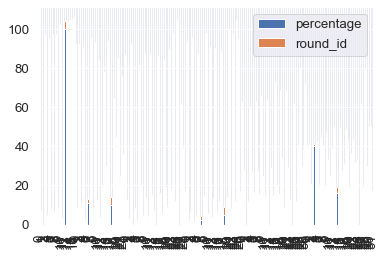

In [700]:
sns.set(font_scale=1.2)


df_to_plot[[ "percentage",  "category", "round_id"]].plot.bar(stacked=True)


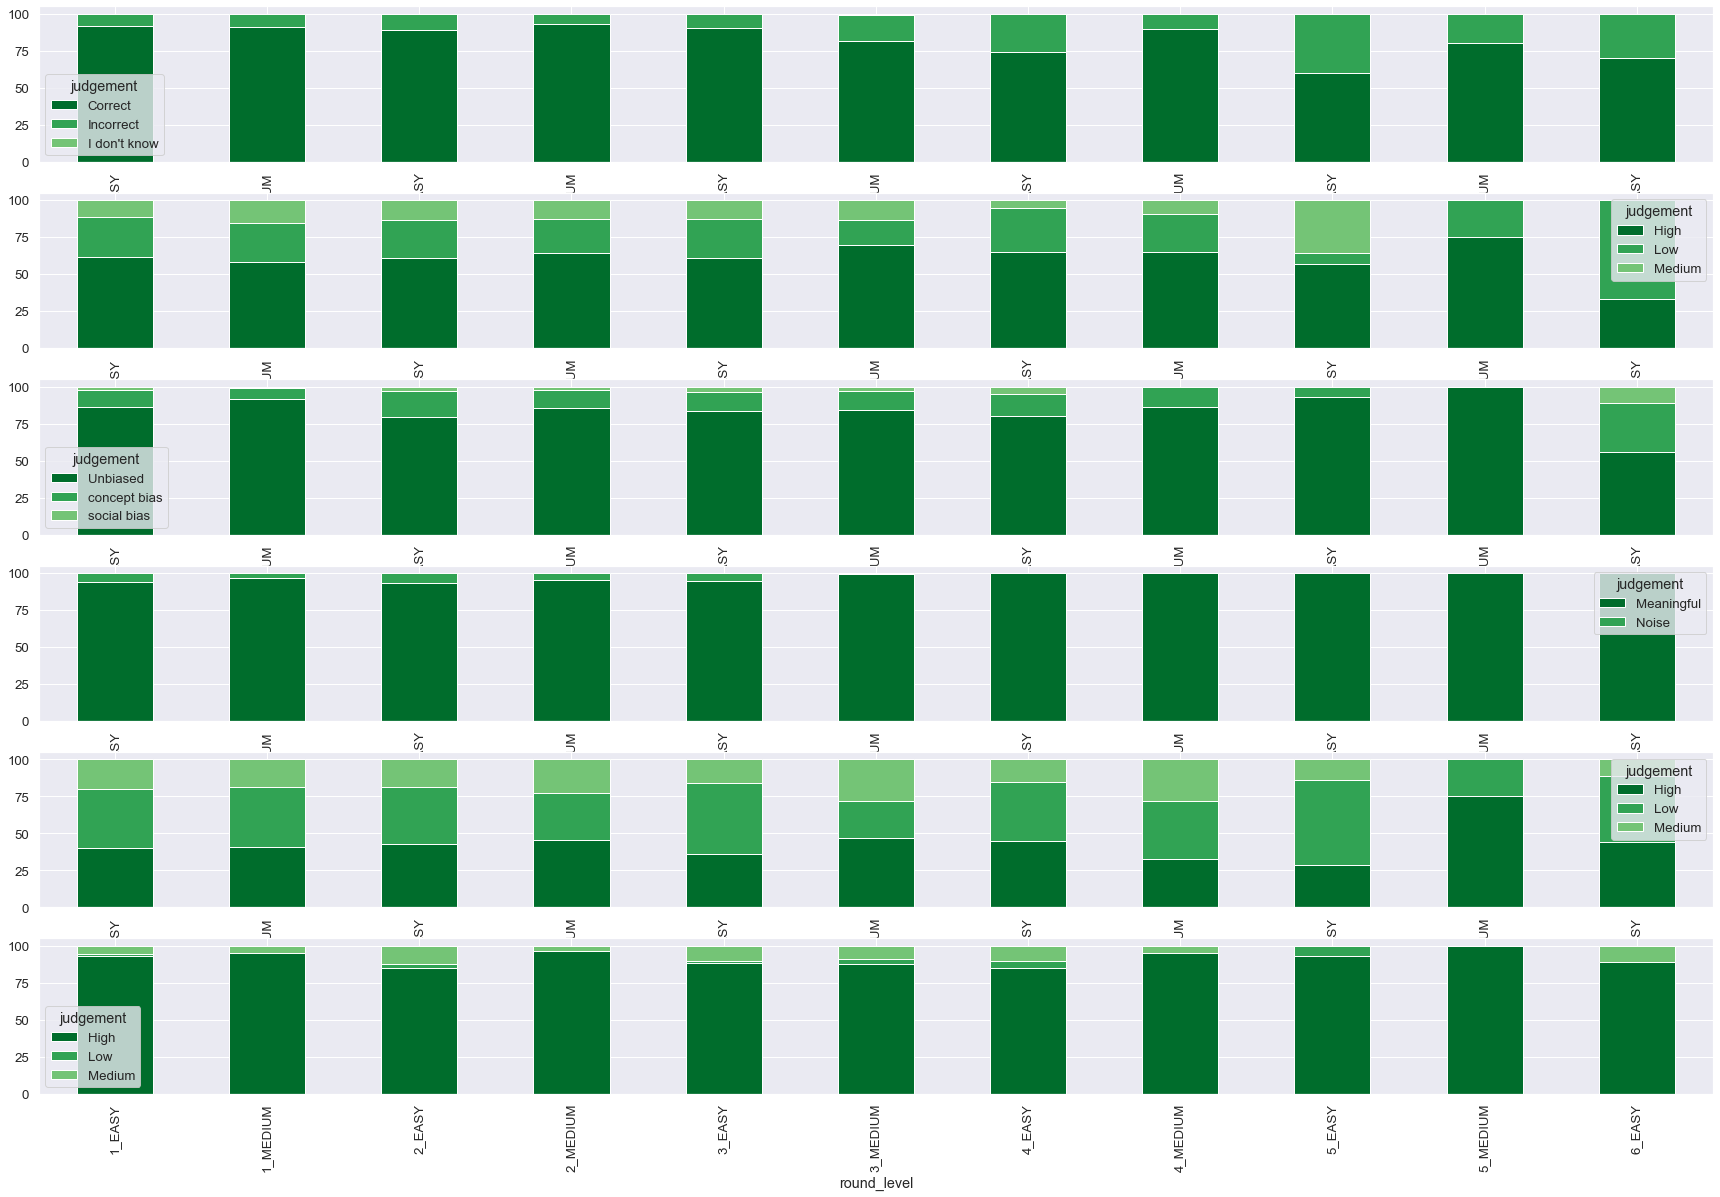

In [701]:

fig, ax = plt.subplots(len(list(set(list(df_to_plot["category"])))), figsize=(30,20))  
#fig, ax = plt.subplots( figsize=(10,7))  



for index, cat in enumerate(list(set(list(df_to_plot["category"])))):
    df_temp = df_to_plot[df_to_plot["category"] == cat]
    months = df_temp['judgement'].drop_duplicates()
    margin_bottom = np.zeros(len(df_temp['round_level'].drop_duplicates()))
    colors = ["#006D2C", "#31A354","#74C476"]

    pivot_df = df_temp.pivot(index='round_level', columns='judgement', values='percentage')
    pivot_df.loc[:,months].plot.bar(stacked=True, color=colors, ax=ax[index])

plt.show()

In [702]:
df_to_plot

,round_id,game_level,Noise,Nb_tuple,round_level,percentage,judgement,category,Correctness,Bias,Typicality,Specificity,Tacitness
0,1,EASY,Meaningful,1198,1_EASY,93.960784,Meaningful,Noise,NaN,NaN,NaN,NaN,NaN
1,1,EASY,Noise,77,1_EASY,6.039216,Noise,Noise,NaN,NaN,NaN,NaN,NaN
2,1,MEDIUM,Meaningful,681,1_MEDIUM,96.322489,Meaningful,Noise,NaN,NaN,NaN,NaN,NaN
3,1,MEDIUM,Noise,26,1_MEDIUM,3.677511,Noise,Noise,NaN,NaN,NaN,NaN,NaN
4,2,EASY,Meaningful,644,2_EASY,93.468795,Meaningful,Noise,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,5,MEDIUM,NaN,3,5_MEDIUM,75.000000,High,Tacitness,NaN,NaN,NaN,NaN,High
28,5,MEDIUM,NaN,1,5_MEDIUM,25.000000,Low,Tacitness,NaN,NaN,NaN,NaN,Low
29,6,EASY,NaN,4,6_EASY,44.444444,High,Tacitness,NaN,NaN,NaN,NaN,High
30,6,EASY,NaN,4,6_EASY,44.444444,Low,Tacitness,NaN,NaN,NaN,NaN,Low


In [703]:
for round_id in range(1, 7):
    for game_level in ["EASY", "MEDIUM"]:
        for cat in ["Noise", "Correctness", "Tacitness", "Bias", "Typicality", "Specificity"]:
            if len(df_to_plot[(df_to_plot["game_level"] == game_level) & (df_to_plot["round_id"] == round_id) & (df_to_plot["category"] == cat)]) == 0:
            
                df_to_plot.loc[len(df_to_plot.index)] = [round_id, game_level, "Meaningful", 0, str(round_id) + "_" + game_level, \
                                            0, list(df_to_plot[cat])[0], cat, "Correct", "High", "Unbiased", "High", "High"] 

print(list(set(list(df_to_plot["category"]))))
df_to_plot

['Correctness', 'Specificity', 'Bias', 'Noise', 'Tacitness', 'Typicality']


,round_id,game_level,Noise,Nb_tuple,round_level,percentage,judgement,category,Correctness,Bias,Typicality,Specificity,Tacitness
0,1,EASY,Meaningful,1198,1_EASY,93.960784,Meaningful,Noise,NaN,NaN,NaN,NaN,NaN
1,1,EASY,Noise,77,1_EASY,6.039216,Noise,Noise,NaN,NaN,NaN,NaN,NaN
2,1,MEDIUM,Meaningful,681,1_MEDIUM,96.322489,Meaningful,Noise,NaN,NaN,NaN,NaN,NaN
3,1,MEDIUM,Noise,26,1_MEDIUM,3.677511,Noise,Noise,NaN,NaN,NaN,NaN,NaN
4,2,EASY,Meaningful,644,2_EASY,93.468795,Meaningful,Noise,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,6,MEDIUM,Meaningful,0,6_MEDIUM,0.000000,NaN,Correctness,Correct,High,Unbiased,High,High
162,6,MEDIUM,Meaningful,0,6_MEDIUM,0.000000,NaN,Tacitness,Correct,High,Unbiased,High,High
163,6,MEDIUM,Meaningful,0,6_MEDIUM,0.000000,NaN,Bias,Correct,High,Unbiased,High,High
164,6,MEDIUM,Meaningful,0,6_MEDIUM,0.000000,NaN,Typicality,Correct,High,Unbiased,High,High


judgement  Meaningful     Noise
round_id                       
1           93.960784  6.039216
2           93.468795  6.531205
3           94.354839  5.645161
4          100.000000       NaN
5          100.000000       NaN
6          100.000000       NaN
judgement    Correct  I don't know  Incorrect
round_id                                     
1          91.976840           NaN   8.023160
2          88.769231      0.307692  10.923077
3          90.598291           NaN   9.401709
4          73.913043           NaN  26.086957
5          60.000000           NaN  40.000000
6          70.000000           NaN  30.000000
judgement   Unbiased  concept bias  social bias
round_id                                       
1          86.177312     11.439466     2.383222
2          79.509632     17.513135     2.977233
3          83.809524     12.380952     3.809524
4          80.000000     15.000000     5.000000
5          92.857143      7.142857          NaN
6          55.555556     33.333333    11

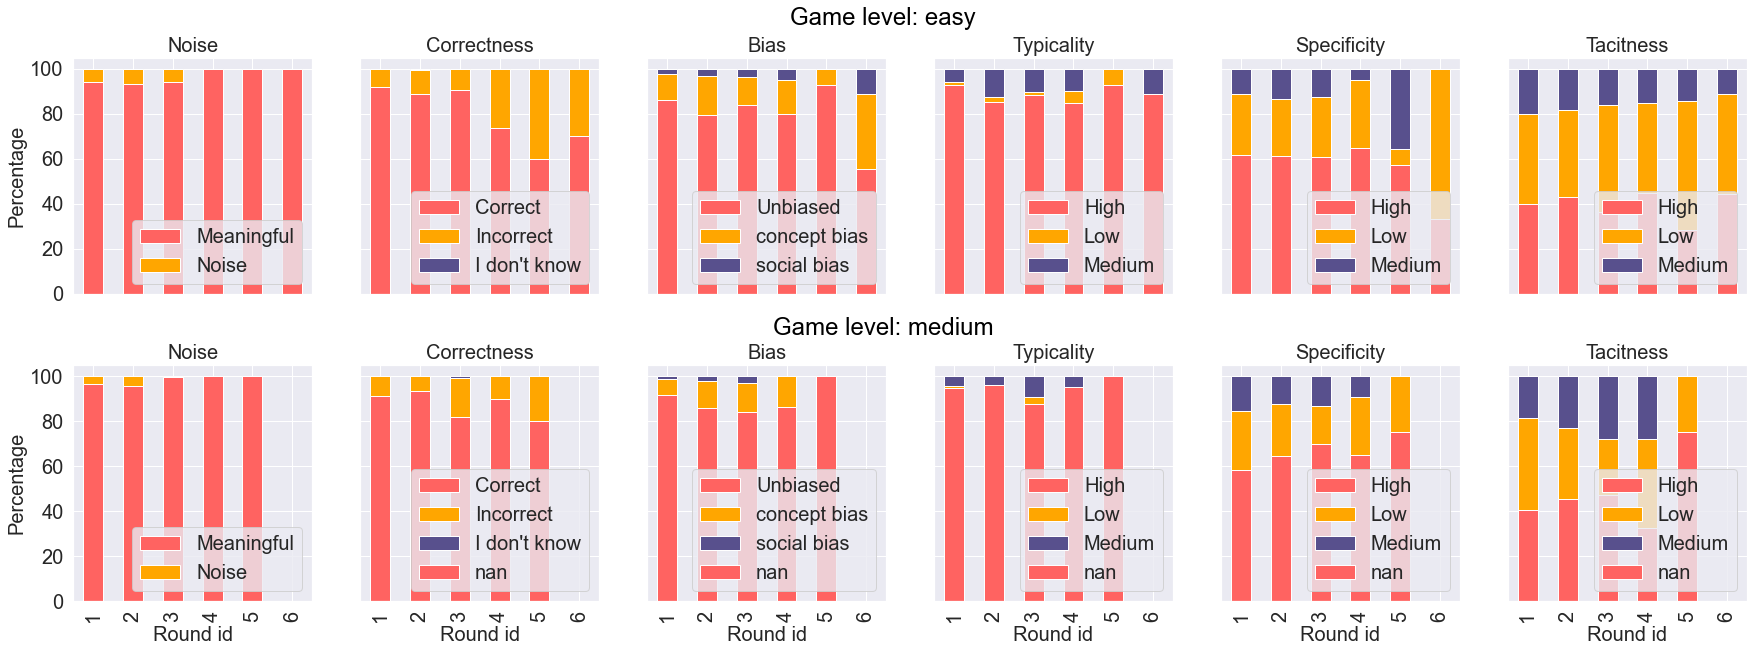

In [704]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(2, len(list(set(list(df_to_plot["category"])))), figsize=(30,10), sharex=True, sharey=True)  
#fig, ax = plt.subplots( figsize=(10,7))  

list_categories = ["Noise", "Correctness", "Bias", "Typicality", "Specificity", "Tacitness"]

            
plt.setp(ax[:, 0], ylabel='Percentage')
for i1, game_level in enumerate(["EASY", "MEDIUM"]):
    ax[i1,0].set_title("Subplot row %s \n" % i1, fontsize=16)

    df1 = df_to_plot[df_to_plot["game_level"] == game_level]
    for index, cat in enumerate(list_categories):
        df_temp = df1[df1["category"] == cat]
        months = df_temp['judgement'].drop_duplicates()
        margin_bottom = np.zeros(len(df_temp['round_id'].drop_duplicates()))
        colors = ["#ff6361", "#ffa600", "#58508d"]

        pivot_df = df_temp.pivot(index='round_id', columns='judgement', values='percentage')
        print(pivot_df)
        pivot_df.loc[:,months].plot.bar(stacked=True, color=colors, ax=ax[i1, index]).legend(loc='lower right',prop = {'size' : 20})
        ax[i1, index].set_title(cat)

        for item in ([ax[i1, index].title,  ax[i1, index].xaxis.label, ax[i1, index].yaxis.label] +
                     ax[i1, index].get_xticklabels() + ax[i1, index].get_yticklabels()):
            item.set_fontsize(20)
plt.setp(ax[-1, :], xlabel='Round id')


plt.figtext(0.5,0.95, "Game level: easy", ha="center", va="top", fontsize=24, color="black")
plt.figtext(0.5,0.52, "Game level: medium", ha="center", va="top", fontsize=24, color="black")
plt.subplots_adjust(hspace = 0.3 )
plt.show()

In [707]:
df[(df["game_ID"] ==282) & df["round_id"] ==1]

,tuple,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,...,Correctness,Sensible - sign,Sensible - relation,Meanings,Bias,Typicality,Specificity,Tacitness,Remarks,Nb_tuple
139,"+ ( mink, IsA, mink )",generative,positive,mink,NaN,IsA,mink,282,EASY,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
140,"+ ( skunk, IsA, mink )",generative,positive,skunk,NaN,IsA,mink,282,EASY,1,...,Incorrect,Flip,NaN,a single interpretation,Unbiased,High,High,High,NaN,1
141,"+ ( rabbit, IsA, mink )",generative,positive,rabbit,NaN,IsA,mink,282,EASY,1,...,Incorrect,Flip,Correct,a single interpretation,Unbiased,High,High,High,NaN,1
142,"+ ( mole, IsA, mink )",generative,positive,mole,NaN,IsA,mink,282,EASY,1,...,Correct,Not Flip,Correct,a single interpretation,NaN,NaN,NaN,NaN,NaN,1
143,"+ ( raccoon, IsA, mink )",generative,positive,raccoon,NaN,IsA,mink,282,EASY,1,...,Incorrect,Flip,Correct,a single interpretation,Unbiased,High,High,High,NaN,1
144,"+ ( squirrel, IsA, mink )",generative,positive,squirrel,NaN,IsA,mink,282,EASY,1,...,Incorrect,Flip,Correct,a single interpretation,Unbiased,High,High,High,NaN,1
145,"+ ( hare, IsA, mink )",generative,positive,hare,NaN,IsA,mink,282,EASY,1,...,Correct,Not Flip,Correct,a single interpretation,NaN,NaN,NaN,NaN,NaN,1
160,"- ( mink, IsA, otter )",generative,negative,mink,NaN,IsA,otter,282,EASY,1,...,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,High,NaN,1
161,"- ( skunk, IsA, otter )",generative,negative,skunk,NaN,IsA,otter,282,EASY,1,...,Correct,NaN,NaN,a single interpretation,Unbiased,High,Low,Low,NaN,1
162,"- ( rabbit, IsA, otter )",generative,negative,rabbit,NaN,IsA,otter,282,EASY,1,...,Correct,Not Flip,Correct,a single interpretation,Unbiased,High,High,Medium,NaN,1


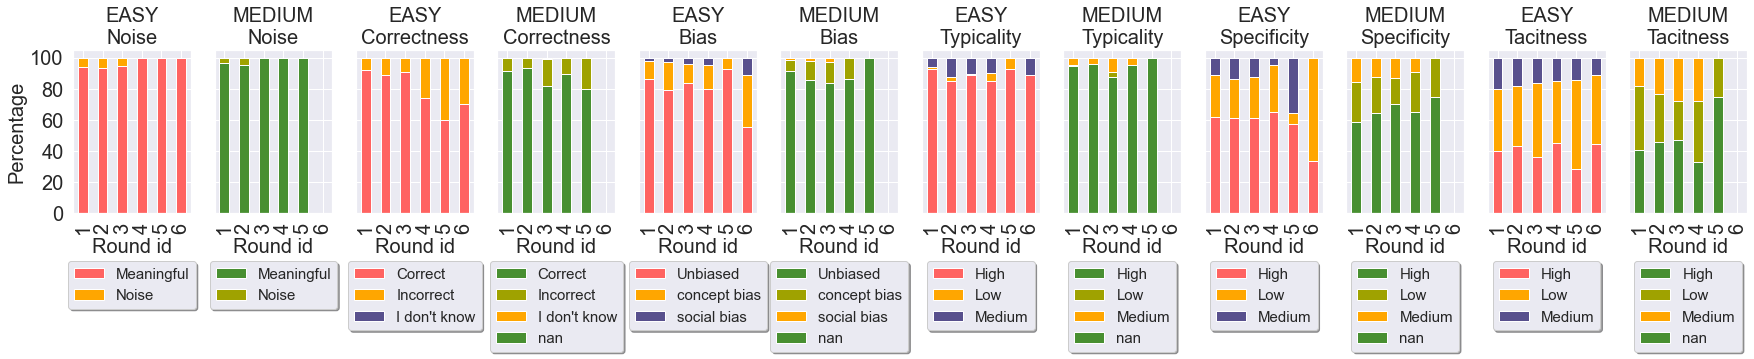

In [708]:
## import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 2*len(list(set(list(df_to_plot["category"])))), figsize=(30,3), sharex=True, sharey=True)  
#fig, ax = plt.subplots( figsize=(10,7))  

list_categories = ["Noise", "Correctness", "Bias", "Typicality", "Specificity", "Tacitness"]

            
plt.setp(ax[ 0], ylabel='Percentage')
for i1, game_level in enumerate(["EASY", "MEDIUM"]):

    df1 = df_to_plot[df_to_plot["game_level"] == game_level]
    for index, cat in enumerate(list_categories):
        df_temp = df1[df1["category"] == cat]
        months = df_temp['judgement'].drop_duplicates()
        margin_bottom = np.zeros(len(df_temp['round_id'].drop_duplicates()))
        colors1 = ["#ff6361", "#ffa600", "#58508d"]
        colors2 = ["#488f31", "#9fa200", "#ffa600"]
        colors = [colors1, colors2]

        pivot_df = df_temp.pivot(index='round_id', columns='judgement', values='percentage')
        pivot_df.loc[:,months].plot.bar(stacked=True, color=colors[i1], ax=ax[index*2 + i1]).legend(loc='lower right',prop = {'size' : 20})
        ax[index*2 + i1].set_title(game_level + "\n" + cat)
        ax[index*2 + i1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
          fancybox=True, shadow=True,prop = {'size' : 15})

        for item in ([ax[index*2 + i1].title,  ax[index*2 + i1].xaxis.label, ax[index*2 + i1].yaxis.label] +
                     ax[index*2 + i1].get_xticklabels() + ax[index*2 + i1].get_yticklabels()):
            item.set_fontsize(20)
plt.setp(ax[:], xlabel='Round id')



plt.subplots_adjust(hspace = 0.3 )
plt.show()

In [722]:
from scipy.stats import chi2_contingency

def computeCorrelation(df, col1, col2, prob):
    # Cross tabulation between GENDER and APPROVE_LOAN
    CrosstabResult=pd.crosstab(index=df[col1],columns=df[col2])

    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)

    # P-Value is the Probability of H0 being True
    # If P-Value>0.05 then only we Accept the assumption(H0)
    
    print(ChiSqResult[0], '. The P-Value of the ChiSq Test is:', ChiSqResult[1])
    #return ChiSqResult
    
    alpha = 1.0 - prob
    if ChiSqResult[1] <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

#print("amount negative knowledge: ", len(df[df["knowledge_sign"] == "negative"]), " amount positive knowledge: ", len(df[df["knowledge_sign"] == "positive"]))
        
prob = 0.95
print("Proba: ", prob)
for k_sign in ["all", "positive", "negative"]:
    df_temp = df.copy()
    if k_sign != "all":
        df_temp = df[df["knowledge_sign"] == k_sign]
    for k_type in ["all"]: #, "discriminative", "generative"]:
        df_temp2 = df_temp.copy()
        if k_type != "all":
            df_temp2 = df_temp2[df_temp2["knowledge_type"] == k_type]
        
        
        for g_difficulty in ["all", "EASY", "MEDIUM"]:
            df_temp3 = df_temp2.copy()
            if g_difficulty != "all":
                df_temp3 = df_temp3[df_temp3["game_level"] == g_difficulty]
                
            print("=================== " + k_sign + "   " + g_difficulty)
            print("amount negative knowledge: ", len(df_temp2[df_temp2["knowledge_sign"] == "negative"]), " amount positive knowledge: ", len(df_temp2[df_temp2["knowledge_sign"] == "positive"]))

            print("Noise")
            (computeCorrelation(df_temp2, "round_id", "Noise", prob))
            print("Correctness")
            (computeCorrelation(df_temp2, "round_id", "Correctness", prob))
            #df_temp3 = df_temp2.copy()
            #df_temp3["knowledge_sign"] = df_temp3.apply(lambda x: new_sign(x), axis=1)
            #print("Knowledge sign")
            #(computeCorrelation(df_temp3, "round_id", "knowledge_sign", prob))
            print("Bias")
            (computeCorrelation(df_temp2, "round_id", "Bias", prob))
            print("Typicality")
            (computeCorrelation(df_temp2, "round_id", "Typicality", prob))
            print("Specificity")
            (computeCorrelation(df_temp2, "round_id", "Specificity", prob))
            print("Tacitness")
            (computeCorrelation(df_temp2, "round_id", "Tacitness", prob))

Proba:  0.95
=================== all   all
amount negative knowledge:  1927  amount positive knowledge:  1604
Noise
12.48269405054307 . The P-Value of the ChiSq Test is: 0.02874011022383993
Dependent (reject H0)
Correctness
45.066965463167996 . The P-Value of the ChiSq Test is: 2.115058247868542e-06
Dependent (reject H0)
Bias
29.16071438221066 . The P-Value of the ChiSq Test is: 0.0011735290024470597
Dependent (reject H0)
Typicality
27.001220970785724 . The P-Value of the ChiSq Test is: 0.0026031822283029836
Dependent (reject H0)
Specificity
20.813281126654832 . The P-Value of the ChiSq Test is: 0.02243385635829949
Dependent (reject H0)
Tacitness
13.902688107778896 . The P-Value of the ChiSq Test is: 0.17747676125124545
Independent (fail to reject H0)
=================== all   EASY
amount negative knowledge:  1927  amount positive knowledge:  1604
Noise
12.48269405054307 . The P-Value of the ChiSq Test is: 0.02874011022383993
Dependent (reject H0)
Correctness
45.066965463167996 . The P

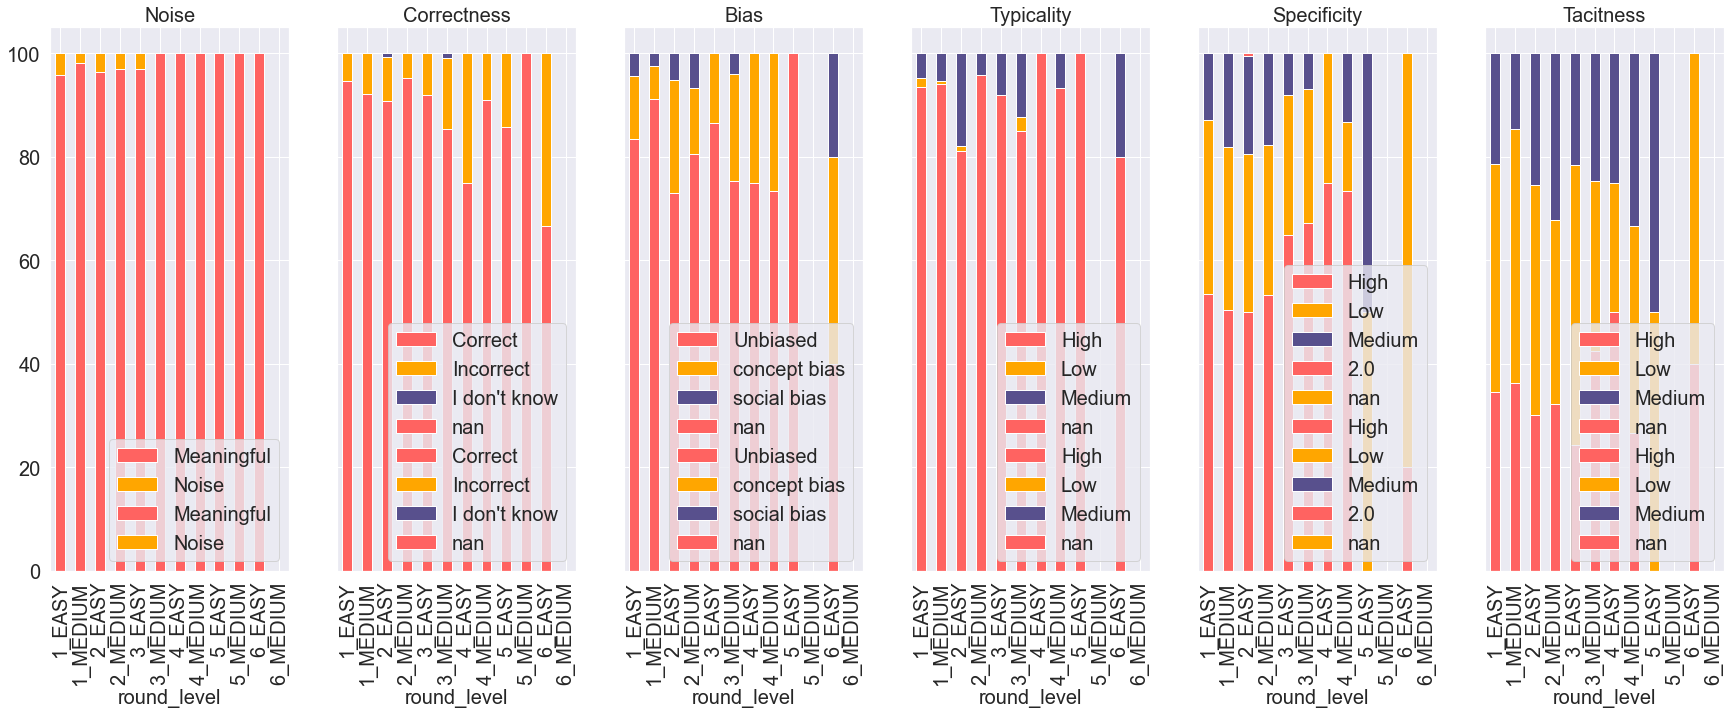

In [648]:
# Combination of easy and medium games

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, len(list(set(list(df_to_plot["category"])))), figsize=(30,10), sharex=True, sharey=True)  
#fig, ax = plt.subplots( figsize=(10,7))  

list_categories = ["Noise", "Correctness", "Bias", "Typicality", "Specificity", "Tacitness"]

            
#plt.setp(ax[:, 0], ylabel='Percentage')

for index, cat in enumerate(list_categories):
    df_temp = df_to_plot[df_to_plot["category"] == cat]
        
    for i1, game_level in enumerate(["EASY", "MEDIUM"]):
        #df1 = df_to_plot[df_to_plot["game_level"] == game_level]
        months = df_temp['judgement'].drop_duplicates()
        margin_bottom = np.zeros(len(df_temp['round_level'].drop_duplicates()))

        
        
        
        colors = ["#ff6361", "#ffa600", "#58508d"]

        pivot_df = df_temp.pivot(index='round_level', columns='judgement', values='percentage')
        pivot_df.loc[:,months].plot.bar(stacked=True, color=colors, ax=ax[index]).legend(loc='lower right',prop = {'size' : 20})
        ax[index].set_title(cat)

        for item in ([ax[index].title,  ax[index].xaxis.label, ax[index].yaxis.label] +
                     ax[index].get_xticklabels() + ax[index].get_yticklabels()):
            item.set_fontsize(20)
#plt.setp(ax[-1, :], xlabel='Round id')



plt.subplots_adjust(hspace = 0.3 )
plt.show()




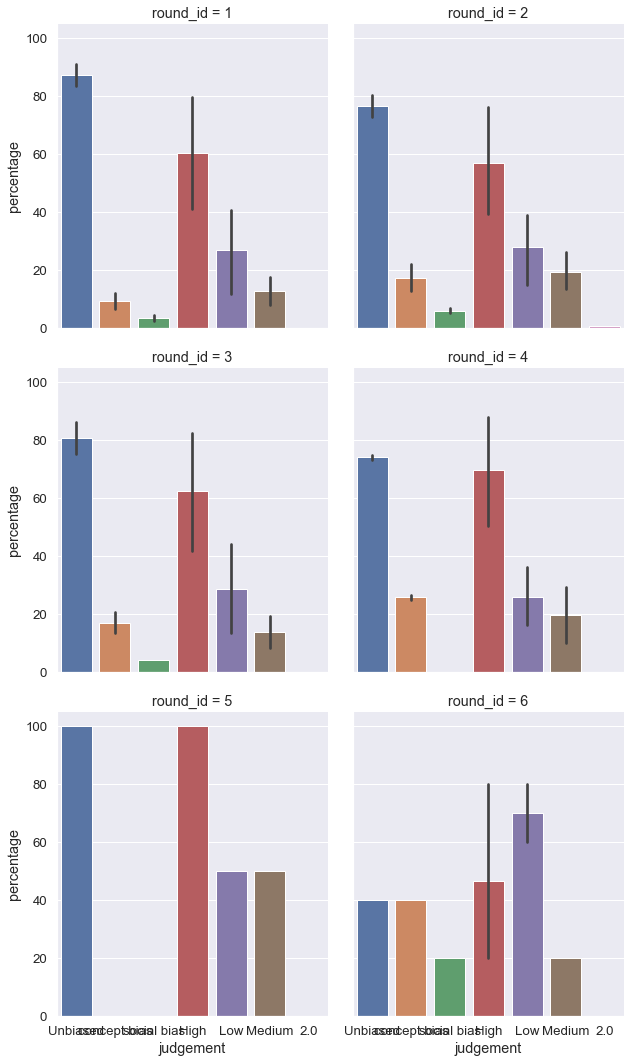

In [364]:

sns.set(font_scale=1.2)


sns.catplot(x="judgement", y="percentage", aspect=.9,  kind="bar", col="round_id", col_wrap=2, data=df_to_plot)



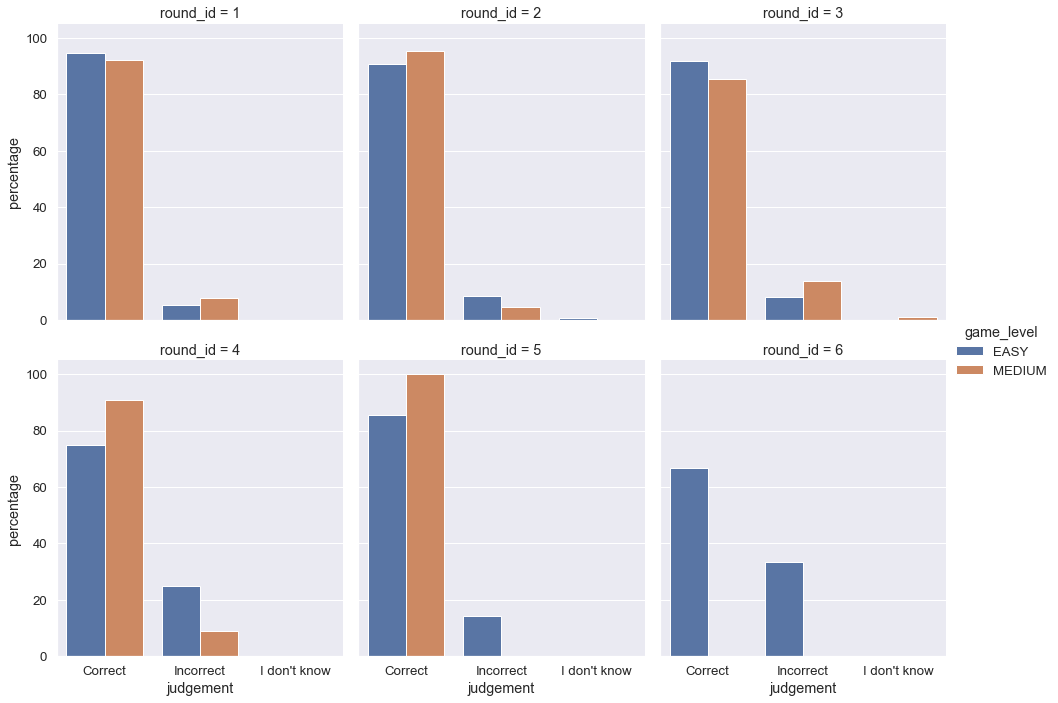

In [355]:

sns.set(font_scale=1.2)
sns.catplot(x="judgement", y="percentage",hue="game_level", aspect=.9,  kind="bar", col="round_id", col_wrap=3, data=df_int_correct)



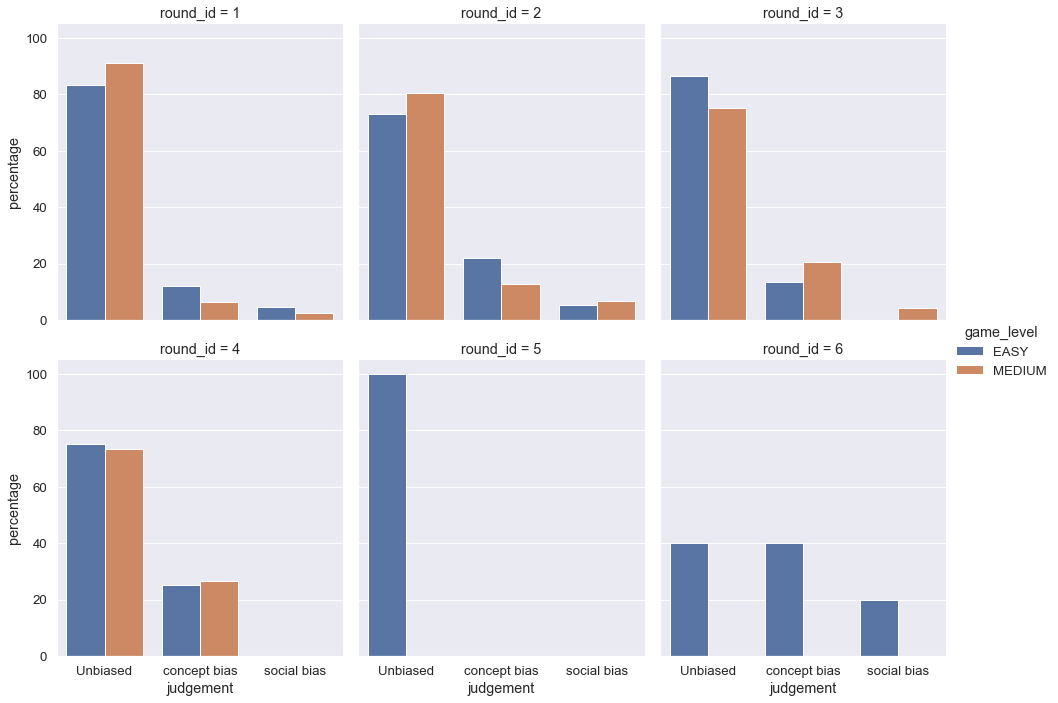

In [356]:

sns.set(font_scale=1.2)
sns.catplot(x="judgement", y="percentage",hue="game_level", aspect=.9,  kind="bar", col="round_id", col_wrap=3, data=df_int_bias)



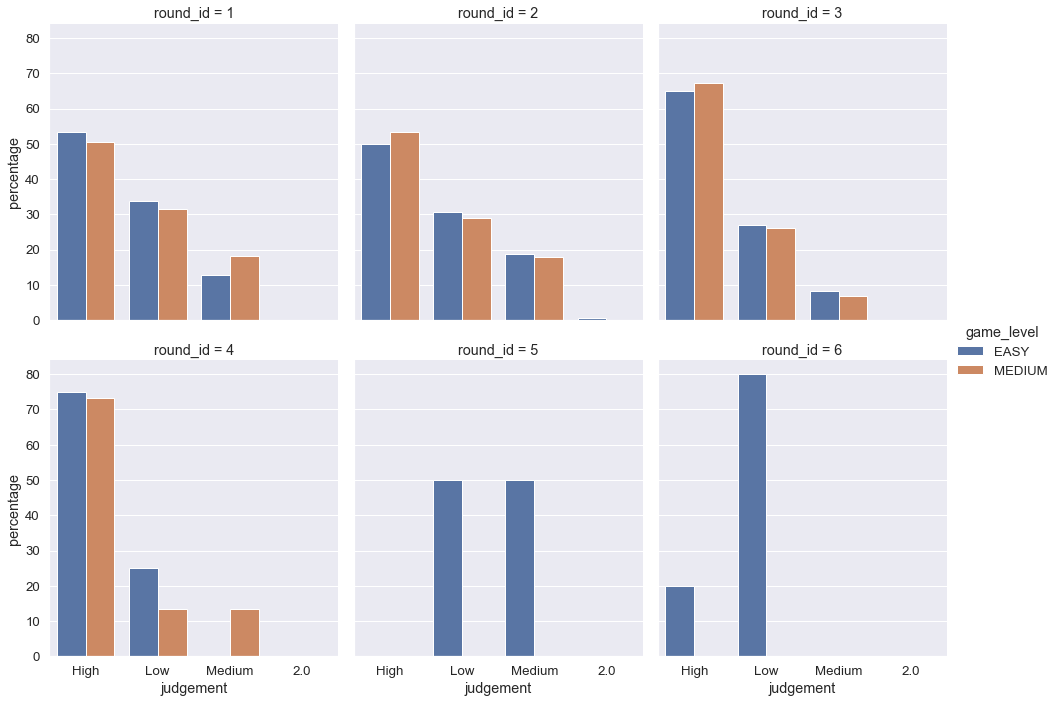

In [358]:

sns.set(font_scale=1.2)
sns.catplot(x="judgement", y="percentage",hue="game_level", aspect=.9,  kind="bar", col="round_id", col_wrap=3, data=df_int_specific)



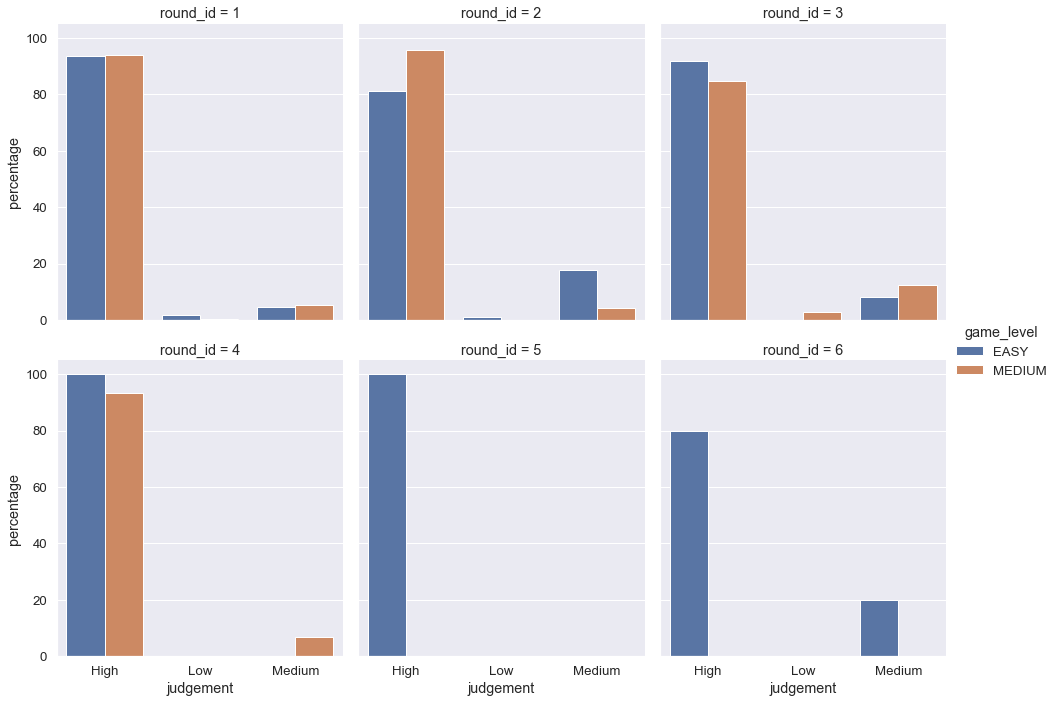

In [359]:

sns.set(font_scale=1.2)
sns.catplot(x="judgement", y="percentage",hue="game_level", aspect=.9,  kind="bar", col="round_id", col_wrap=3, data=df_int_typical)



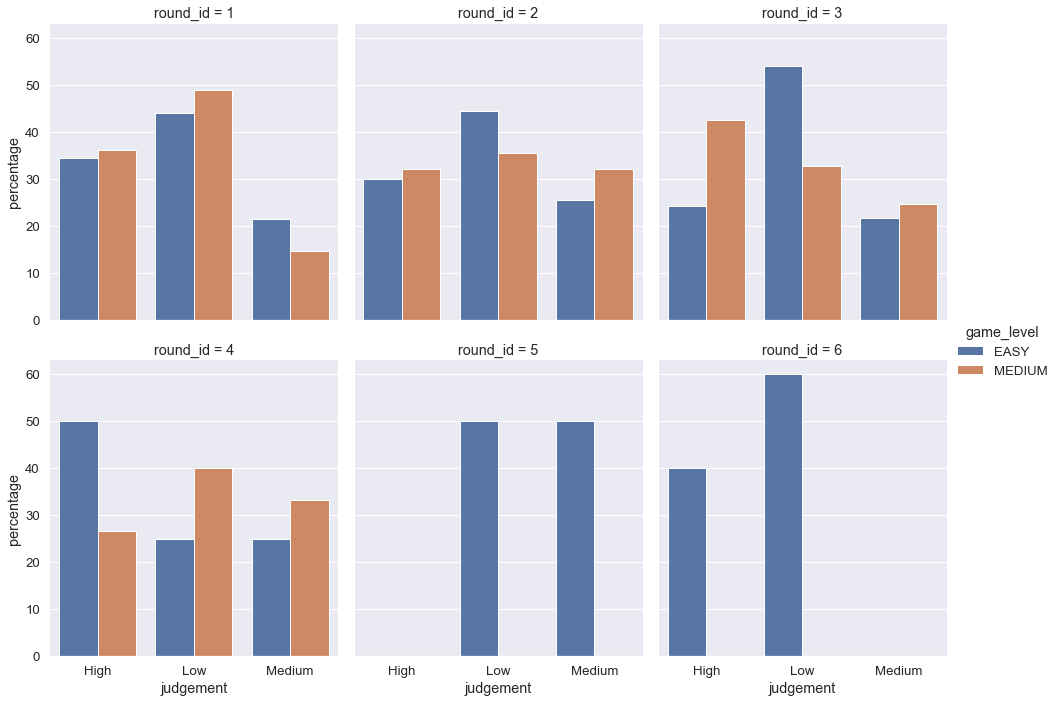

In [360]:

sns.set(font_scale=1.2)
sns.catplot(x="judgement", y="percentage",hue="game_level", aspect=.9,  kind="bar", col="round_id", col_wrap=3, data=df_int_tacit)



# Efficiency analysis

In [747]:
df_analysis = df.copy()

Nb games played: 255
Nb easy games played: 164
Nb medium games played: 91


Nb tuples: 75491


In [796]:
print("Nb games played:", len(list(set(list(df_analysis["game_ID"])))))
print("Nb easy games played:", len(list(set(list(df_analysis[df_analysis["game_level"] == "EASY"]["game_ID"])))))
print("Nb medium games played:", len(list(set(list(df_analysis[df_analysis["game_level"] == "MEDIUM"]["game_ID"])))))

print("Nb tuples:", len(df_analysis))

print("% generative +:", len(df_analysis[(df_analysis["knowledge_type"] == "gen.") & \
                                         (df_analysis["knowledge_sign"] == "+")]) / len(df_analysis) * 100) 
print("% generative -:", len(df_analysis[(df_analysis["knowledge_type"] == "gen.") & \
                                         (df_analysis["knowledge_sign"] == "-")]) / len(df_analysis)* 100)
print("% discriminative +:", len(df_analysis[(df_analysis["knowledge_type"] == "discr.") & \
                                         (df_analysis["knowledge_sign"] == "+")]) / len(df_analysis)* 100)
print("% discriminative -:", len(df_analysis[(df_analysis["knowledge_type"] == "discr.") & \
                                         (df_analysis["knowledge_sign"] == "-")]) / len(df_analysis)* 100)

print("% overlap:", len(list(set(list(df_analysis["knowledge_piece"])))) / len(df_analysis) * 100)


import statistics

print("Uniqueness")
def uniquenessPerGame(df_analysis):
    pd_games = pd.concat([df_analysis.groupby("game_ID").size().to_frame('nb_tuples'), \
                          df_analysis.groupby('game_ID')['knowledge_piece'].apply(list)], axis=1)
    pd_games["unique_tuples"] = pd_games.apply(lambda x: len(list(set(x["knowledge_piece"]))), axis=1)
    pd_games["percentage_unique_tuples"] =pd_games.apply(lambda x: x["unique_tuples"] / x["nb_tuples"] * 100, axis=1)

    print(statistics.mean(list(pd_games["percentage_unique_tuples"])))
    print(statistics.stdev(list(pd_games["percentage_unique_tuples"])))

print("All games:")
uniquenessPerGame(df_analysis)
print("easy games")
uniquenessPerGame(df_analysis[df_analysis["game_level"] == "EASY"])
print("medium games")
uniquenessPerGame(df_analysis[df_analysis["game_level"] == "MEDIUM"])

print("Game length")
def timePerGame(df_analysis):
    temp_df = (df_analysis[["game_ID", "round_id", "turn_time"]].drop_duplicates())
    pd_games = pd.concat([temp_df.groupby('game_ID')['turn_time'].apply(list),\
               temp_df.groupby('game_ID')['round_id'].apply(list)], axis=1)
    pd_games["duration"] = pd_games.apply(lambda x: sum(x["turn_time"]) , axis=1)
    print(statistics.mean(list(pd_games["duration"])))
    print(statistics.stdev(list(pd_games["duration"])))
    
    
print("All games:")
timePerGame(df_analysis)    
print("easy games")
timePerGame(df_analysis[df_analysis["game_level"] == "EASY"])
print("medium games")
timePerGame(df_analysis[df_analysis["game_level"] == "MEDIUM"])  
    

Nb games played: 255
Nb easy games played: 164
Nb medium games played: 91
Nb tuples: 75491
% generative +: 5.281424275741479
% generative -: 6.384867070246784
% discriminative +: 22.757679723410735
% discriminative -: 65.576028930601
% overlap: 91.08635466479448
Uniqueness
All games:
98.90709931190847
5.2039435885705645
easy games
99.13072000067777
4.40982299771666
medium games
98.50409059808246
6.399491838134839
Game length
All games:
378.01803921568626
591.07227723638
easy games
367.2012195121951
722.2813018602299
medium games
397.5120879120879
201.37828628129745


In [792]:
a = df_analysis[["game_ID", "round_id", "asker_id", "replier_id", "turn_time"]].drop_duplicates()
a[a["game_ID"] == 657]

,game_ID,round_id,asker_id,replier_id,turn_time
74698,657,1,4,127,60.0
74703,657,2,4,127,70.6
74709,657,3,4,127,31.1
74712,657,4,4,127,44.1
74714,657,1,127,4,57.1
74717,657,2,127,4,85.1
74728,657,3,127,4,45.2


In [782]:
df_analysis[])

,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category
0,"+ ( plum, HasProperty, red )",gen.,+,plum,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
1,"+ ( grapefruit, HasProperty, red )",gen.,+,grapefruit,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
2,"+ ( cherry, HasProperty, red )",gen.,+,cherry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
3,"+ ( raspberry, HasProperty, red )",gen.,+,raspberry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
4,"+ ( pear, HasProperty, yellow )",gen.,+,pear,NaN,HasProperty,yellow,267,EASY,2,45,46,1,3,49.9,gen. +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75486,"- ( cherry, strawberry, HasA, edible skin )",discr.,-,cherry,strawberry,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75487,"- ( cherry, grapefruit, HasA, edible skin )",discr.,-,cherry,grapefruit,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75488,"- ( cherry, peach, HasA, edible skin )",discr.,-,cherry,peach,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75489,"- ( cherry, orange, HasA, edible skin )",discr.,-,cherry,orange,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -


,knowledge_piece,knowledge_type,knowledge_sign,concept1,concept2,relation,NL_input,game_ID,game_level,round_id,asker_id,replier_id,nb_game_session_asker,nb_game_session_replier,turn_time,knowledge category
0,"+ ( plum, HasProperty, red )",gen.,+,plum,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
1,"+ ( grapefruit, HasProperty, red )",gen.,+,grapefruit,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
2,"+ ( cherry, HasProperty, red )",gen.,+,cherry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
3,"+ ( raspberry, HasProperty, red )",gen.,+,raspberry,NaN,HasProperty,red,267,EASY,1,45,46,1,3,55.1,gen. +
4,"+ ( pear, HasProperty, yellow )",gen.,+,pear,NaN,HasProperty,yellow,267,EASY,2,45,46,1,3,49.9,gen. +
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75486,"- ( cherry, strawberry, HasA, edible skin )",discr.,-,cherry,strawberry,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75487,"- ( cherry, grapefruit, HasA, edible skin )",discr.,-,cherry,grapefruit,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75488,"- ( cherry, peach, HasA, edible skin )",discr.,-,cherry,peach,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
75489,"- ( cherry, orange, HasA, edible skin )",discr.,-,cherry,orange,HasA,edible skin,657,MEDIUM,3,127,4,7,24,45.2,discr. -
